In [ ]:
import geopandas as gpd
from shapely.geometry import LineString, Polygon, MultiPoint, Point
from shapely.ops import nearest_points, split
import matplotlib.pyplot as plt

# Load the data
box_data = gpd.read_file(
    "C:\\Users\\olive\\Projects\\diss\\data\\terminus\\terminus_box_dj.geojson"
)
terminus_data = gpd.read_file(
    "C:\\Users\\olive\\Projects\\diss\\data\\terminus\\terminus_dj_1978_2021.geojson"
)

# Plot the original box and terminus data
fig, ax = plt.subplots(figsize=(8, 8))
box_data.plot(ax=ax, color="lightblue", edgecolor="blue")
terminus_data.plot(ax=ax, color="orange", edgecolor="red")
ax.set_title("Original Box and Terminus Data")
plt.show()

from shapely.ops import unary_union

curvilinear_boxes = []
curvilinear_boxes.append(box_data)

# Iterate over each row in terminus_data
for index, row in terminus_data.iterrows():
    print(row)
    print(box_data)
    # Intersect the box with the terminus line to get the intersection geometry
    difference = split(box_data.loc[0, "geometry"], LineString(row))

    # # Check if intersection is empty or not
    # if not intersection.is_empty:
    #     # Take the difference between the original box and the intersection geometry
    #     curvilinear_box = box_data["geometry"].difference(unary_union(intersection))
    # else:
    #     # If there's no intersection, use the original box
    #     curvilinear_box = box_data["geometry"]

    # # Append the curvilinear box to the list
    # curvilinear_boxes.append(curvilinear_box)

    # Plot the curvilinear boxes
    fig, ax = plt.subplots(figsize=(8, 8))
    # x, y = difference.exterior.geometry.iloc[0].coords
    # ax.plot(x, y, color="green")
    box_data.plot(ax=ax, color="lightblue", edgecolor="blue")
    difference.plot(ax=ax, color="orange", edgecolor="red")
    ax.set_title("Curvilinear Boxes")
    plt.show()

# Save the curvilinear boxes to a GeoJSON file
curvilinear_boxes_gdf = gpd.GeoDataFrame(geometry=curvilinear_boxes, crs=terminus_data.crs)
curvilinear_boxes_gdf.to_file("curvilinear_boxes.geojson", driver="GeoJSON")

Working on DJ
Working on UI


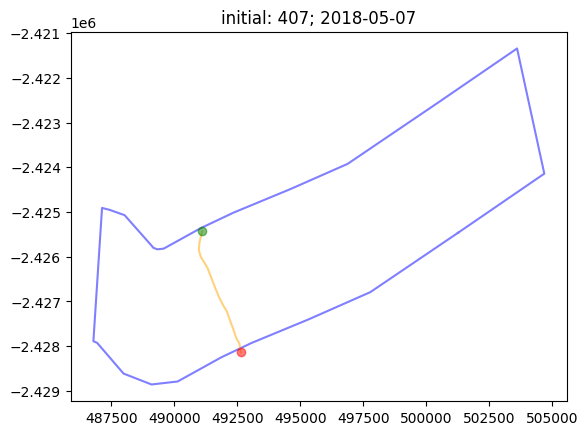

start relocating
end fine


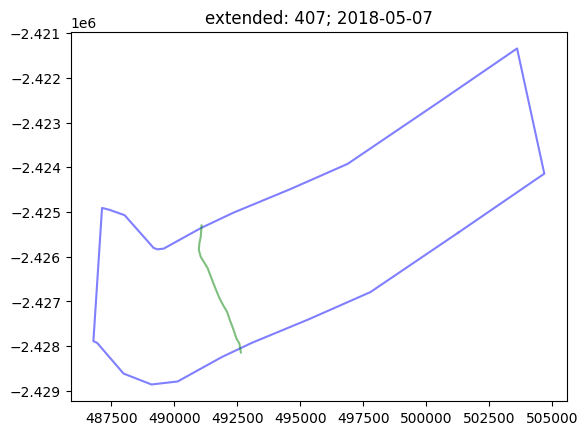

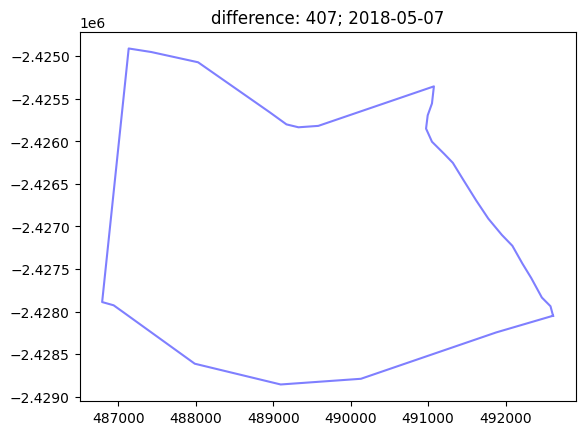

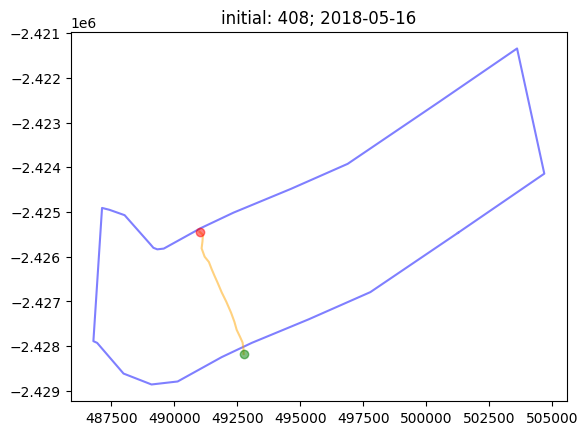

start fine
end relocating


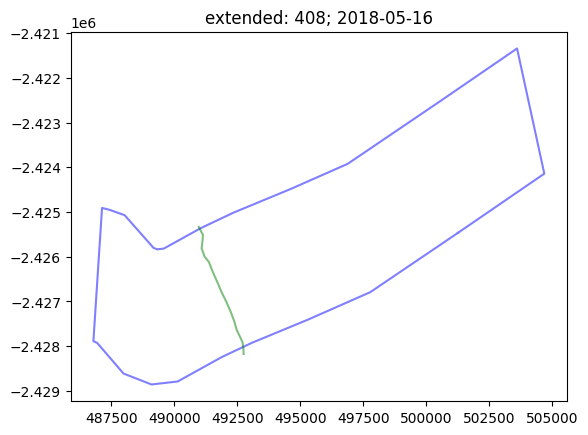

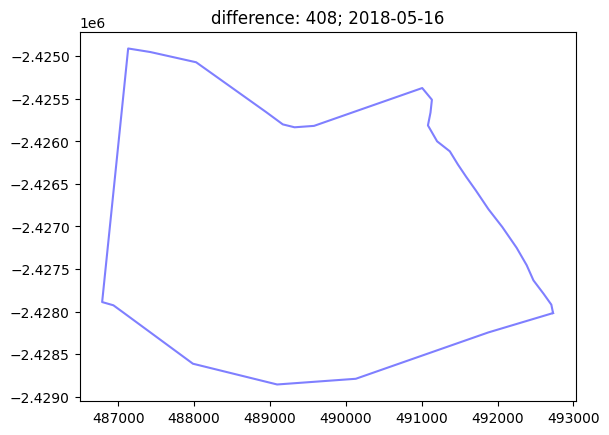

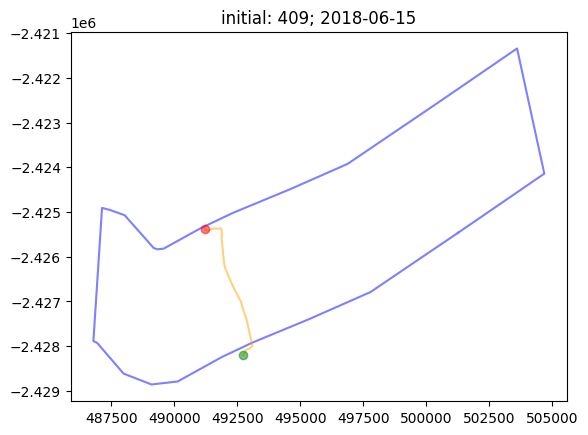

start fine
end relocating


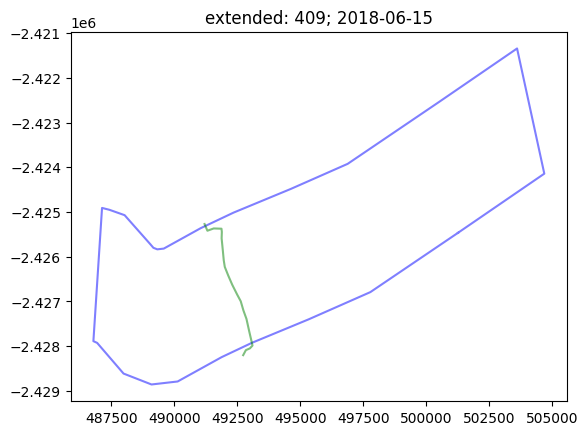

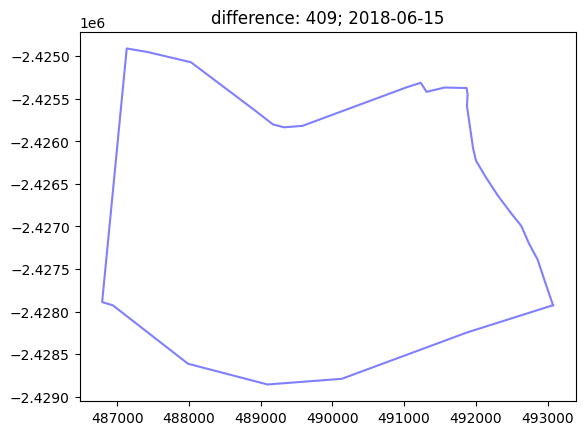

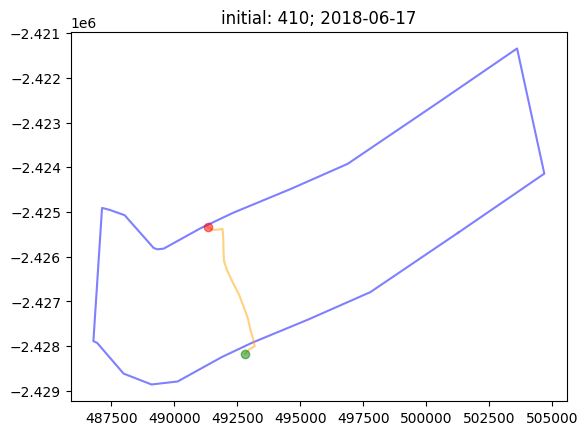

start fine
end relocating


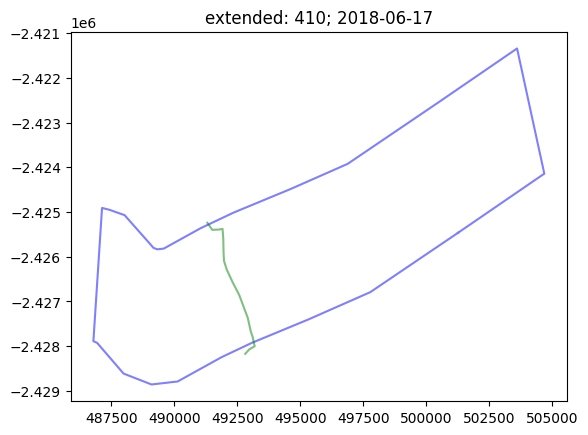

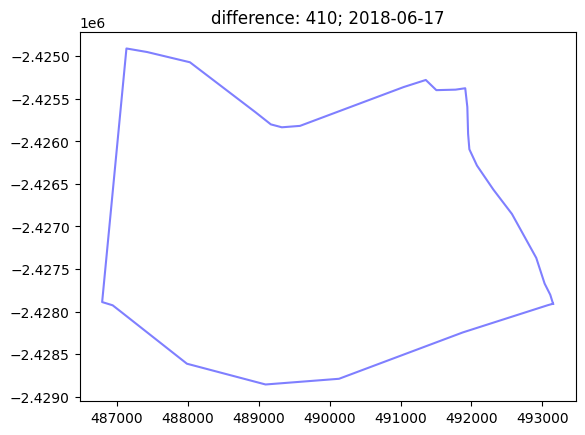

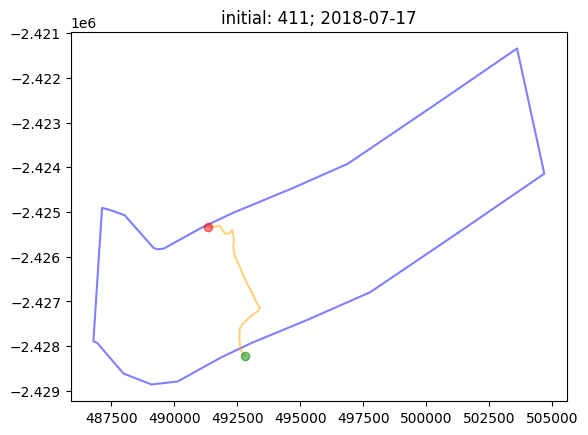

start fine
end relocating


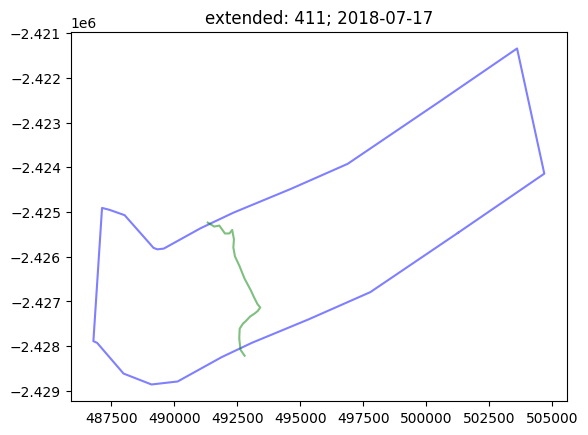

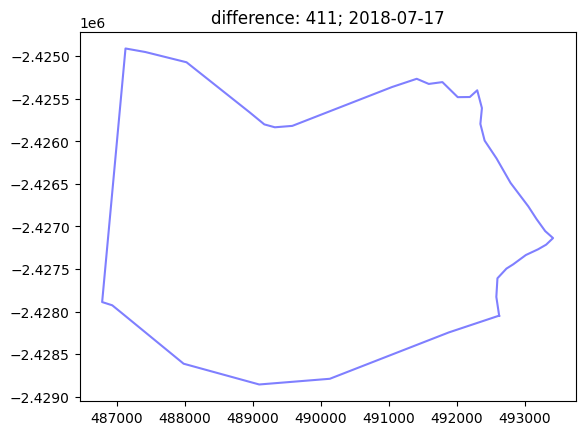

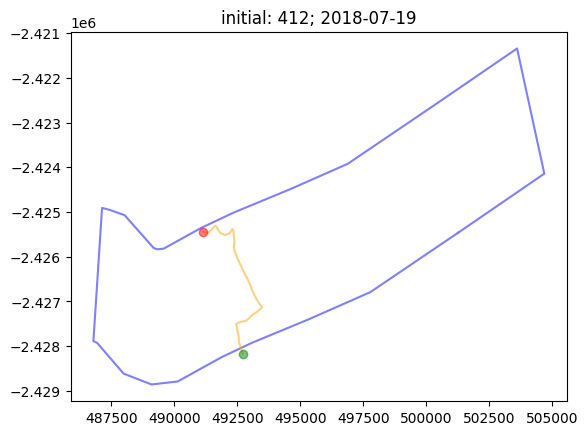

start fine
end relocating


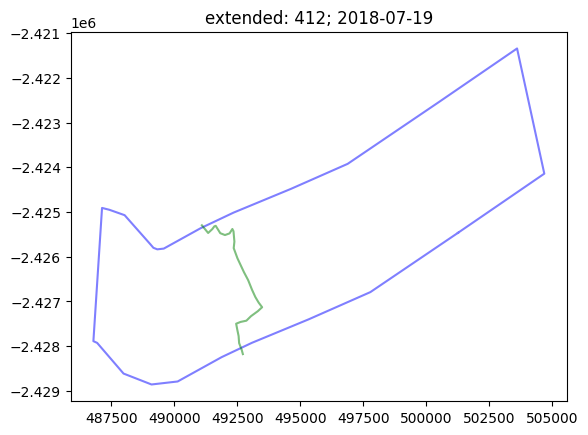

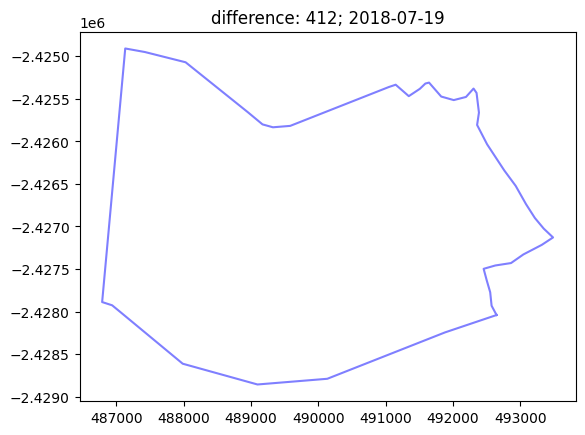

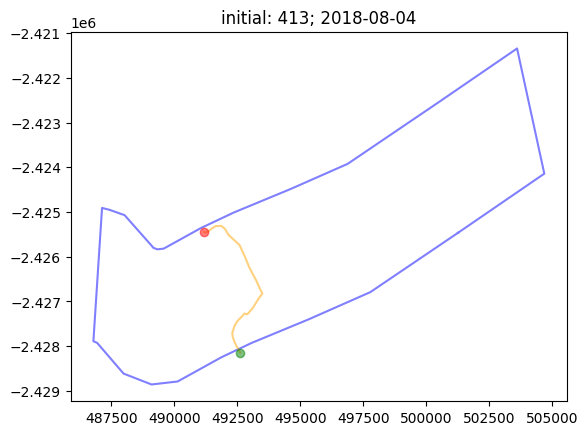

start fine
end relocating


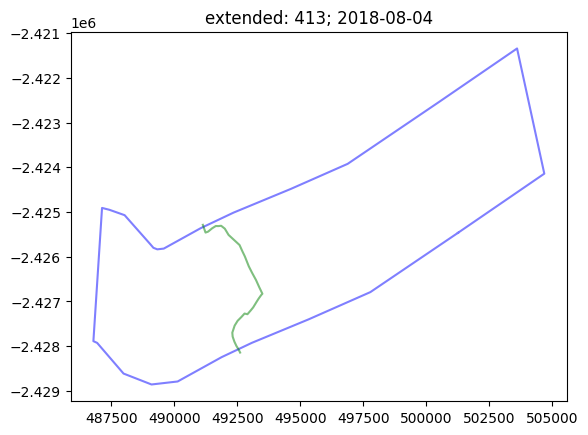

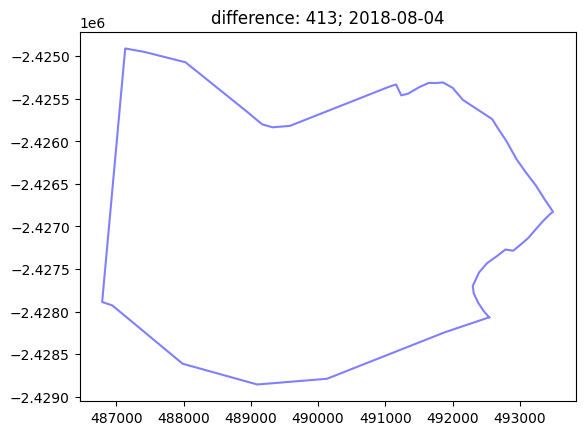

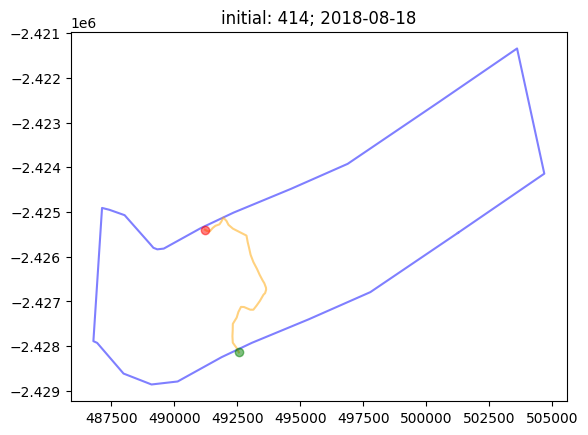

start fine
end relocating


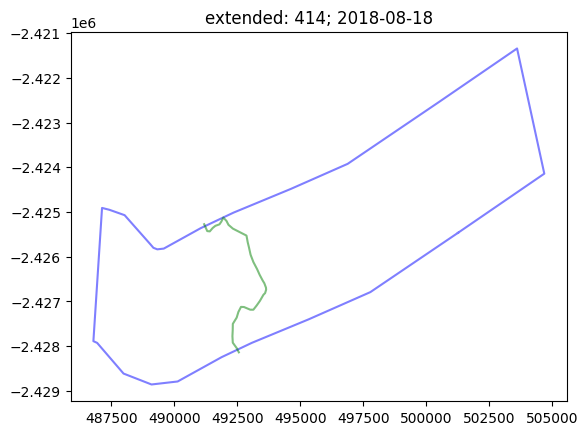

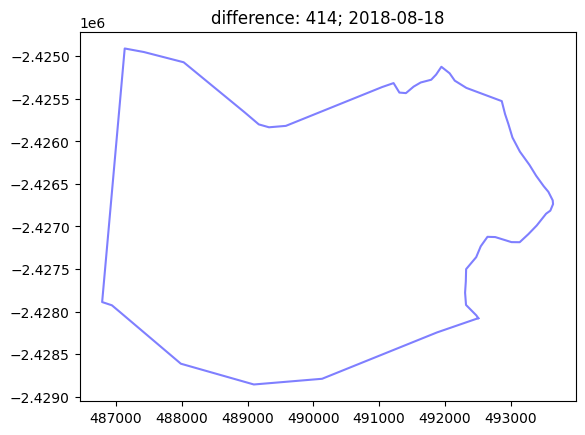

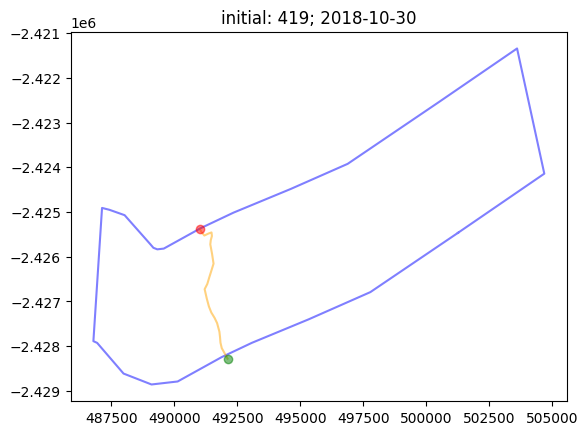

start fine
end relocating


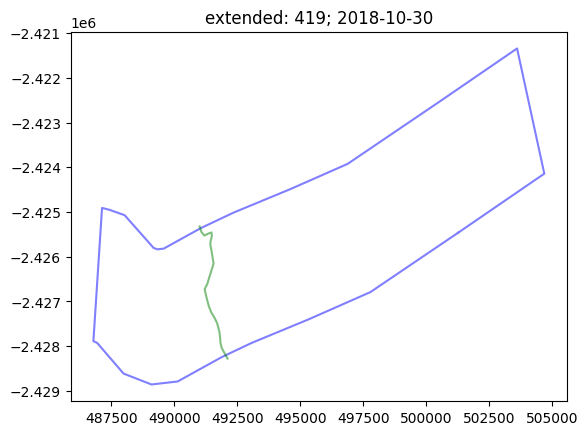

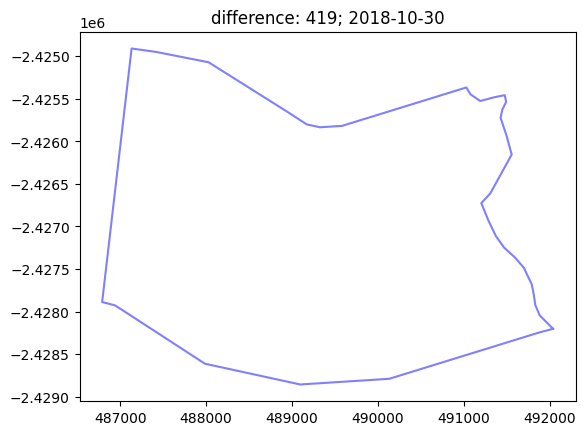

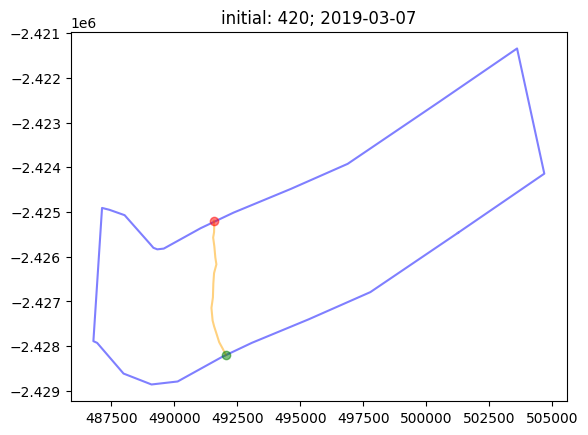

start relocating
end fine


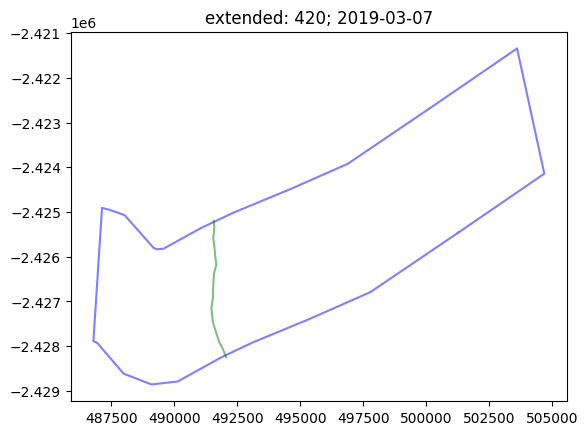

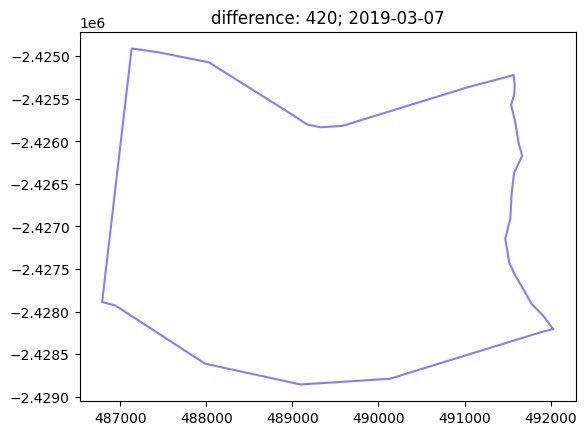

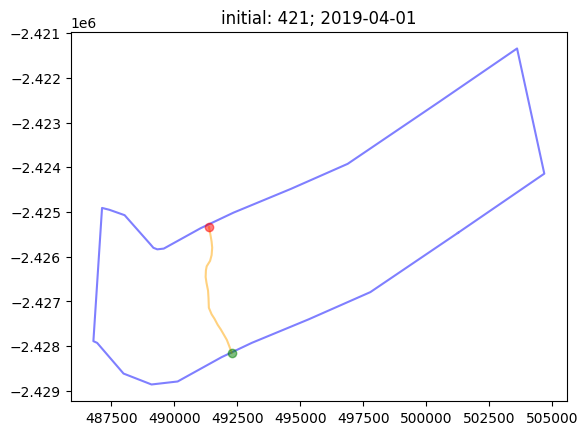

start fine
end relocating


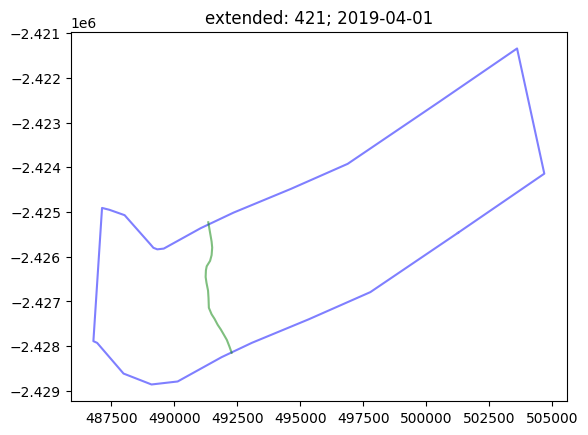

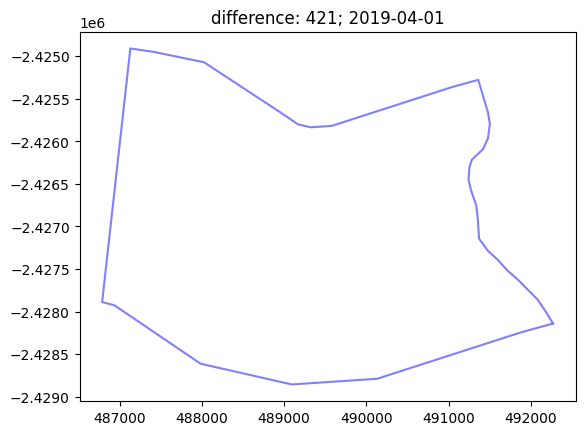

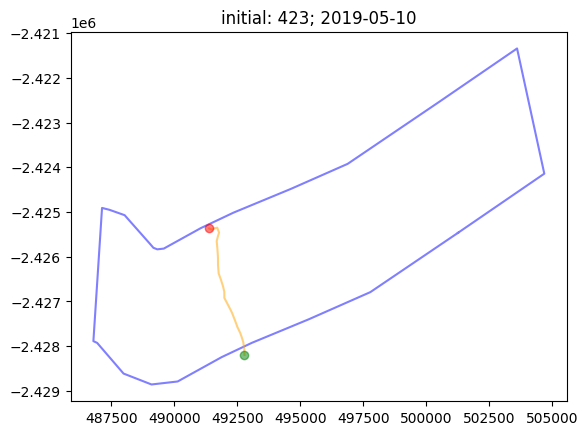

start fine
end relocating


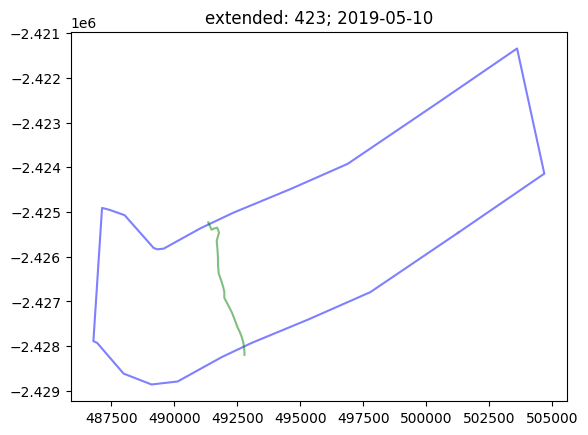

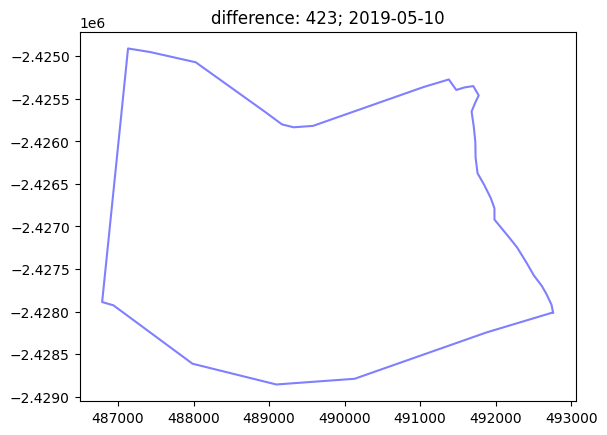

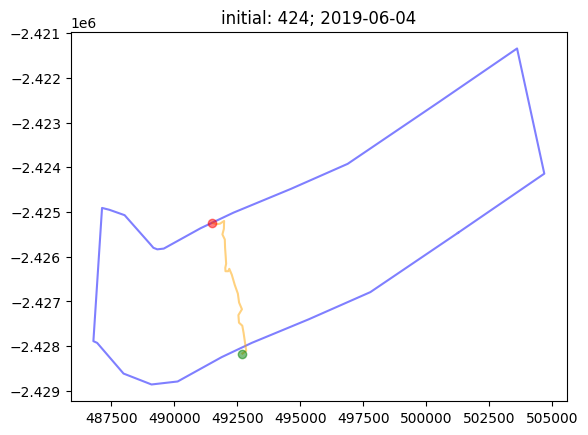

start fine
end relocating


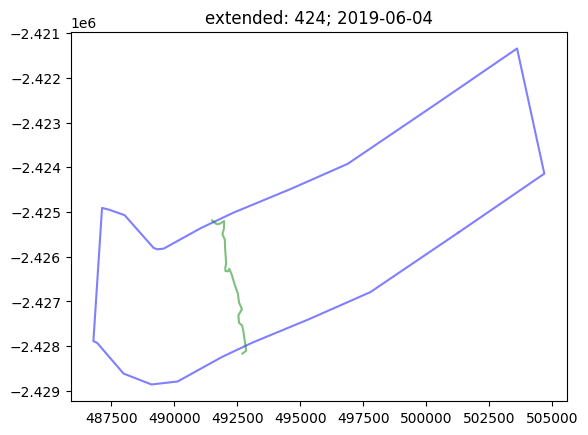

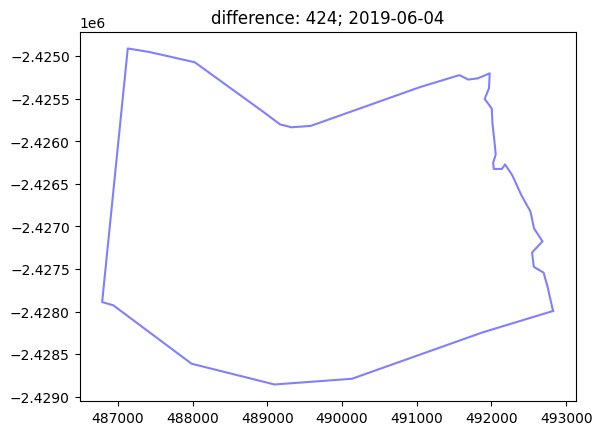

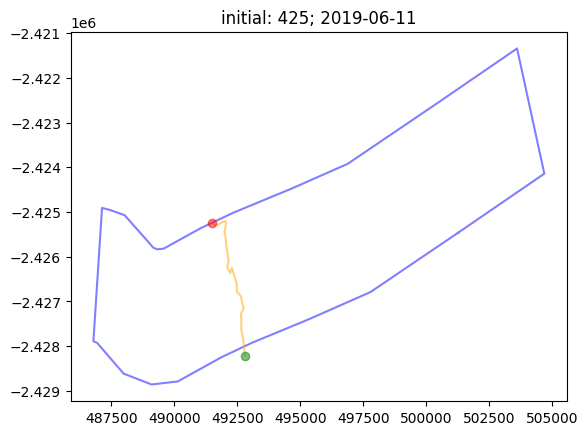

start fine
end relocating


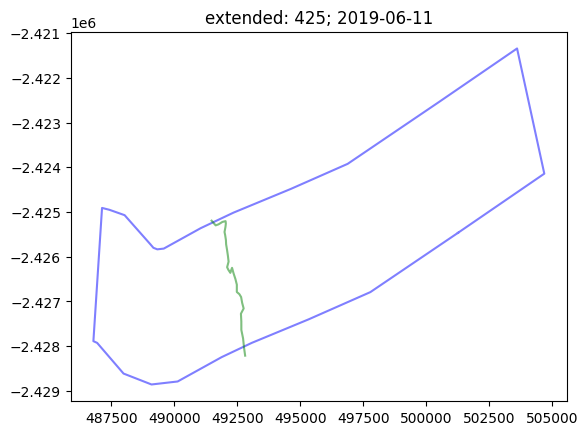

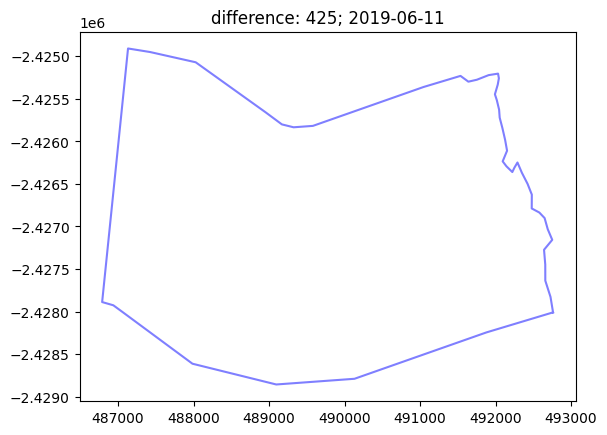

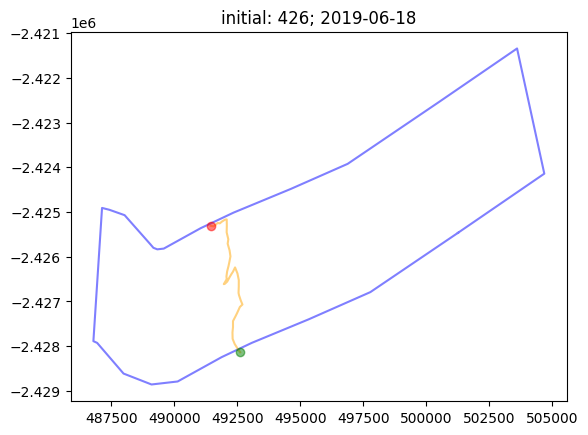

start fine
end relocating


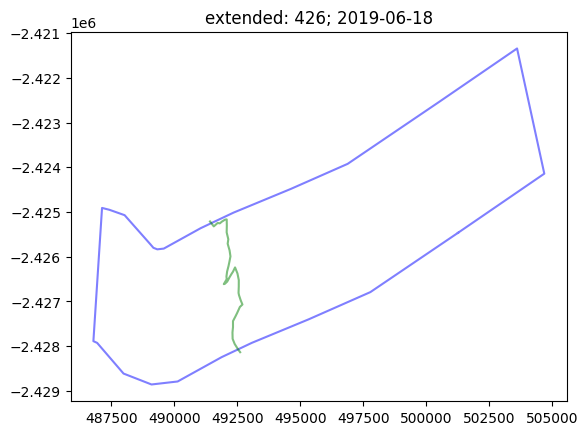

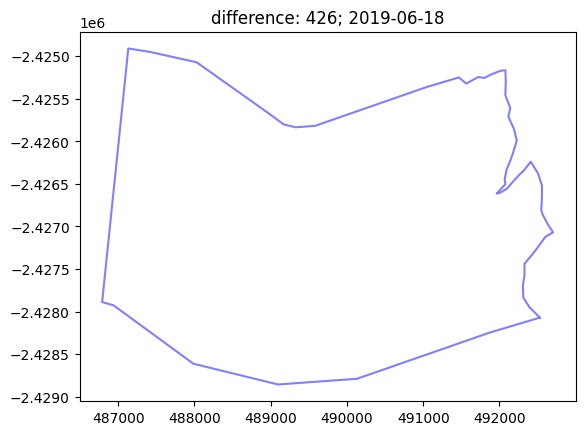

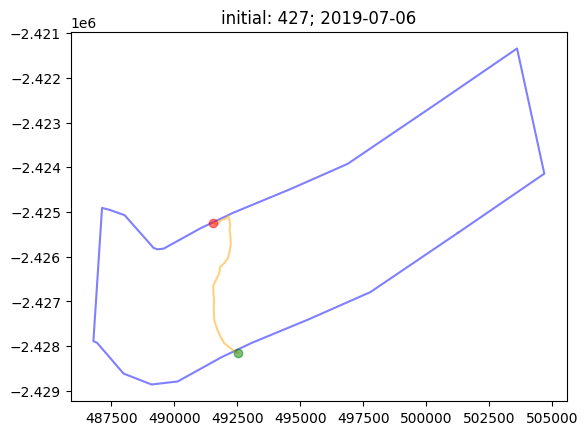

start fine
end relocating


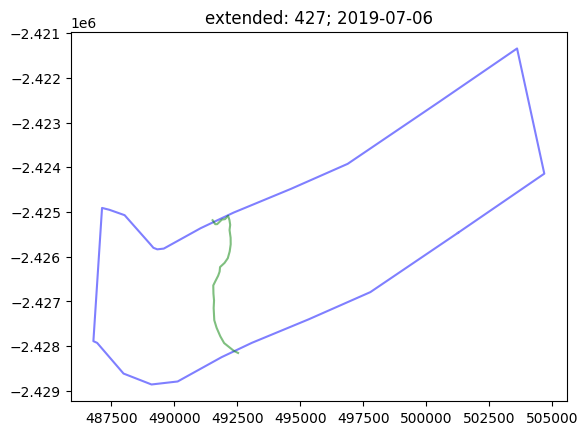

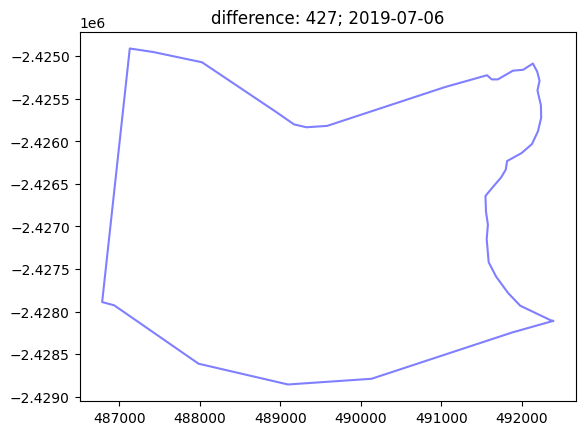

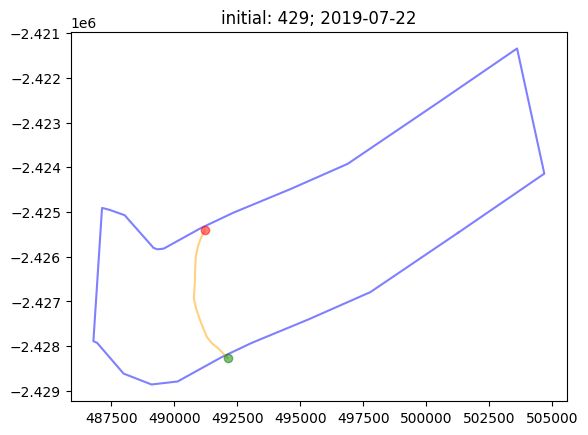

start fine
end relocating


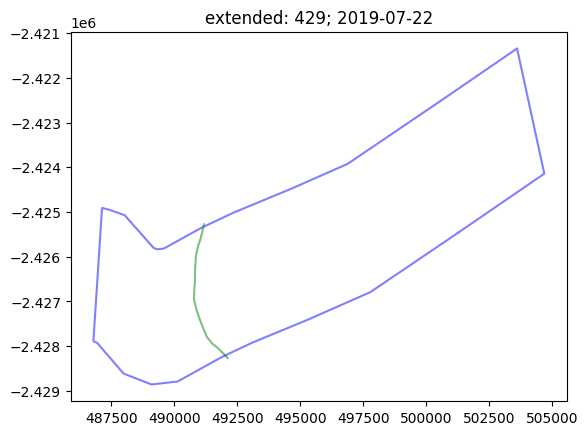

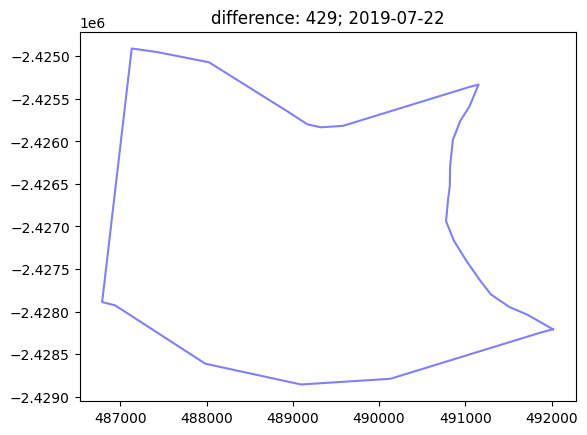

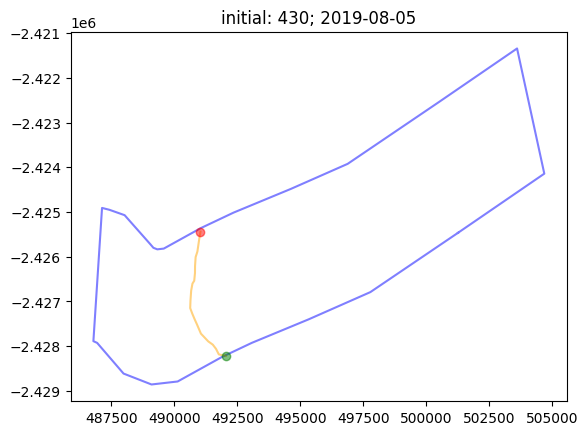

start fine
end relocating


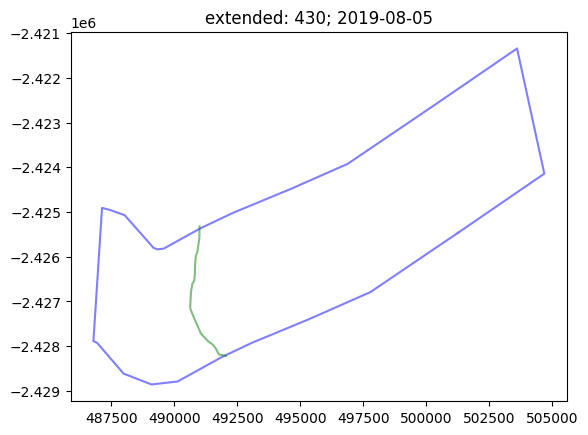

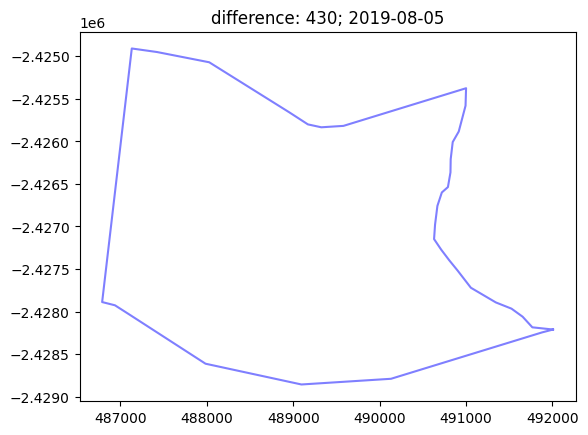

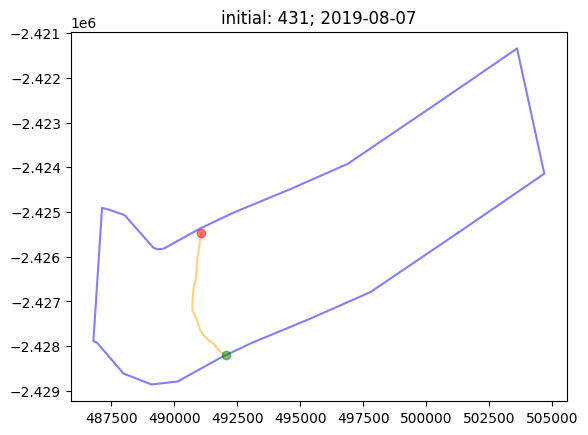

start fine
end relocating


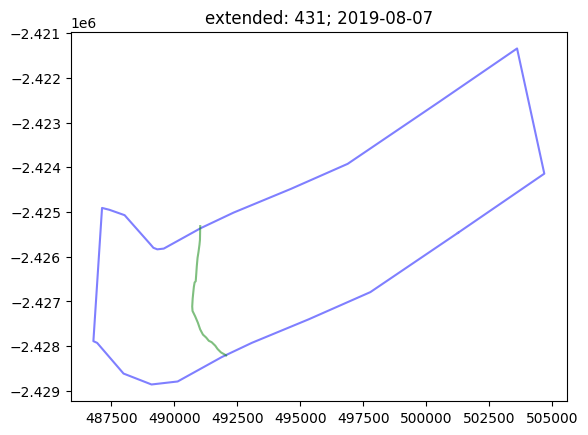

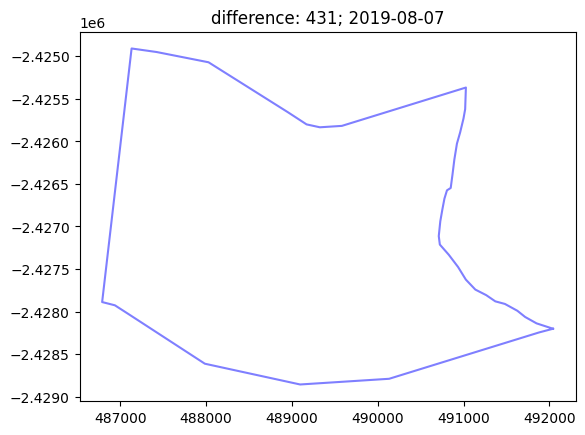

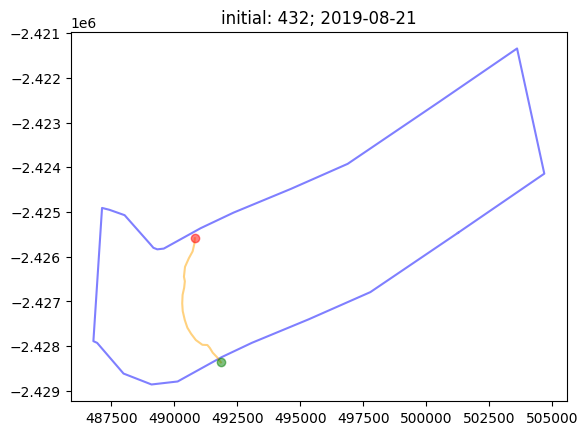

start fine
end relocating


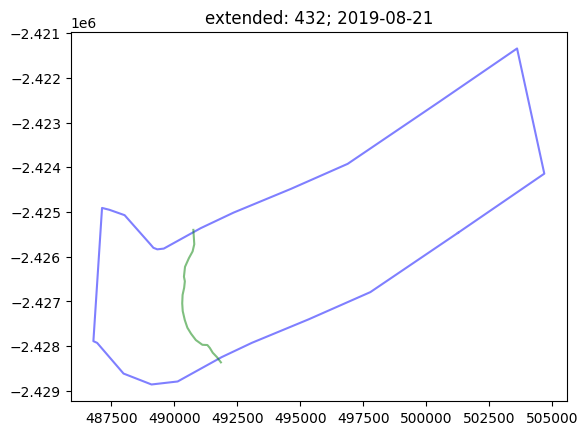

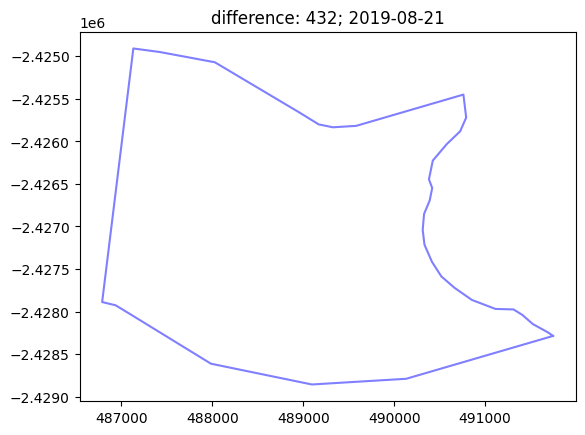

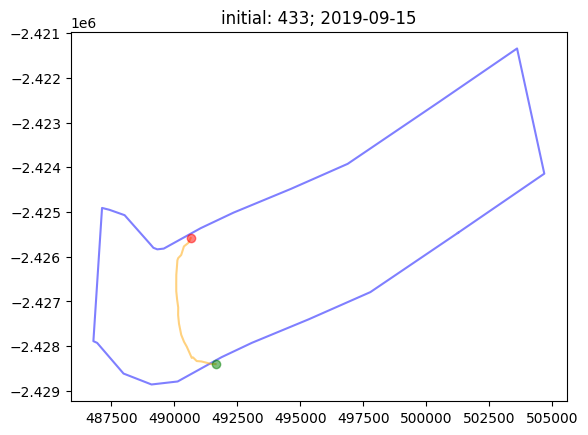

start fine
end relocating


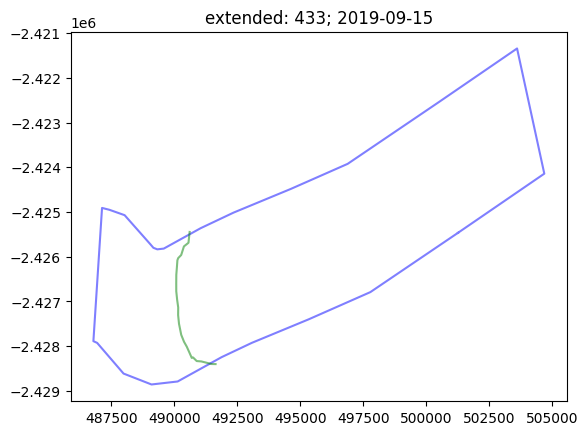

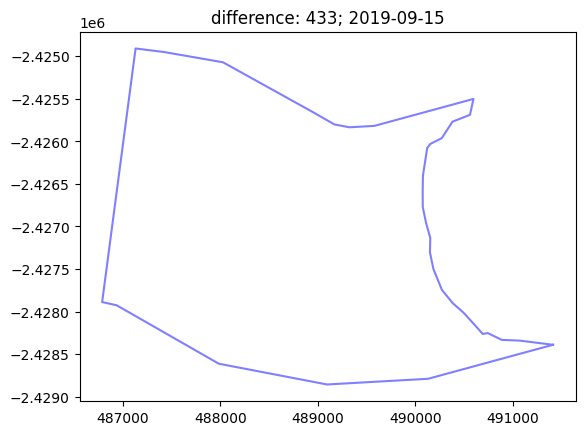

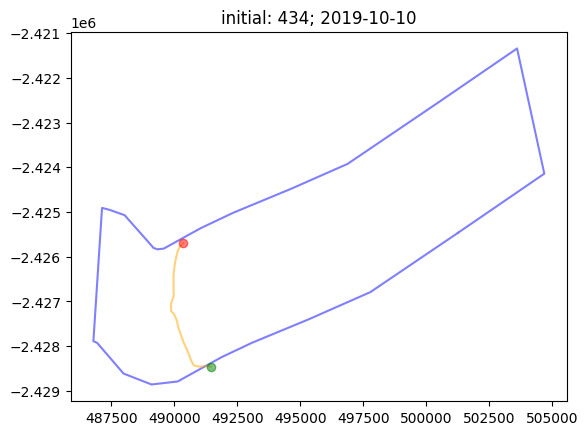

start fine
end relocating


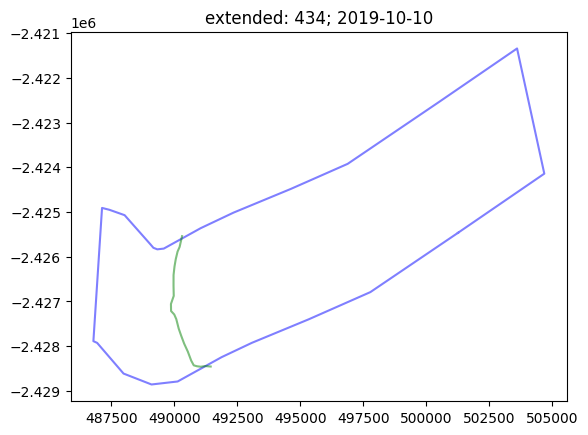

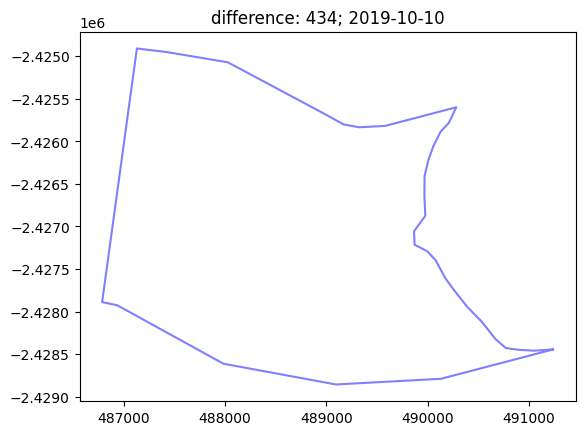

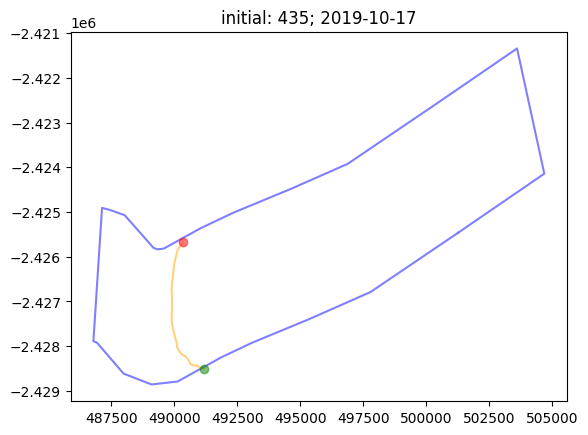

start fine
end relocating


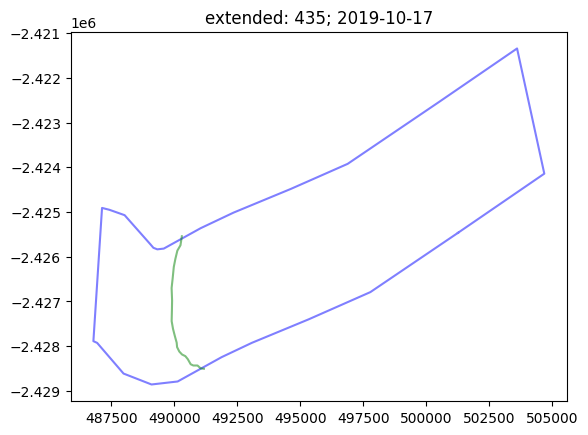

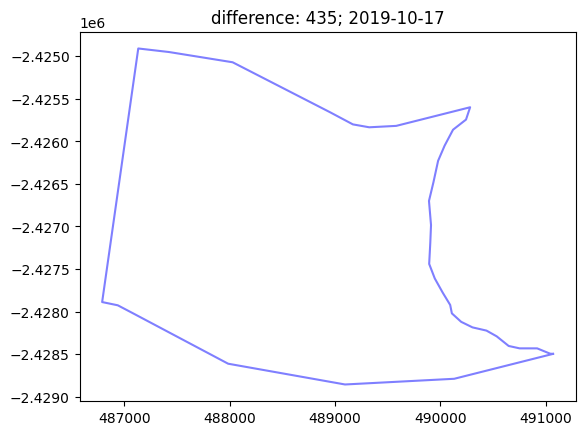

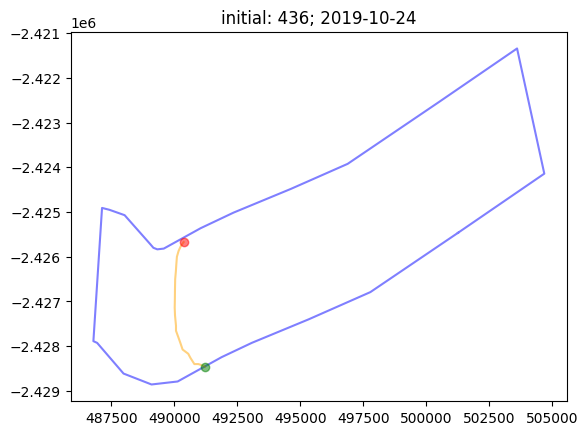

start fine
end relocating


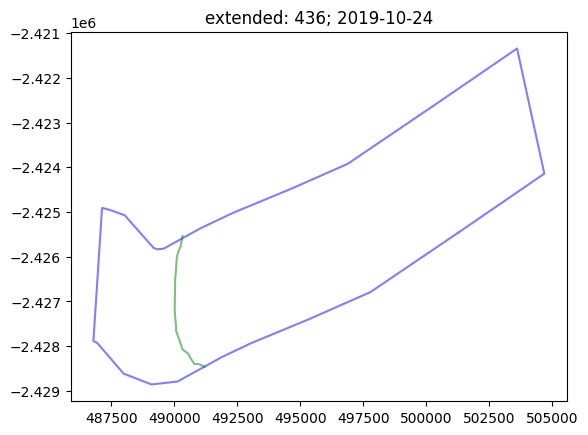

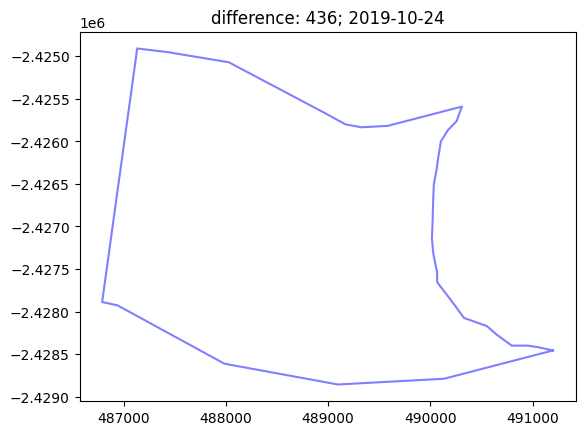

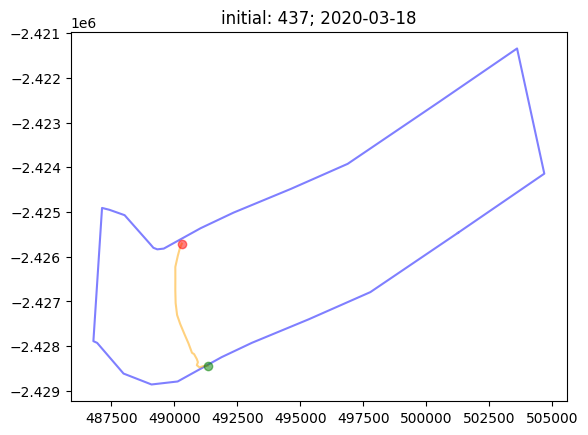

start fine
end relocating


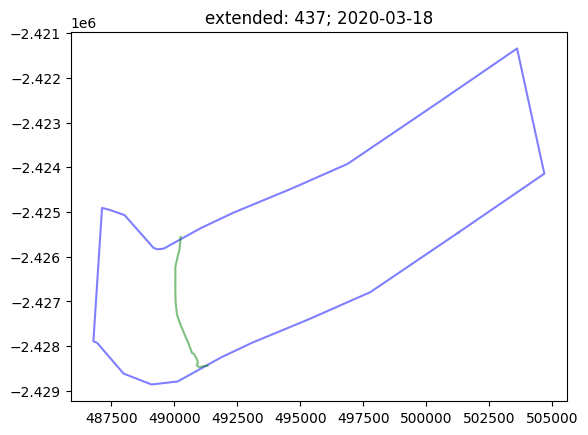

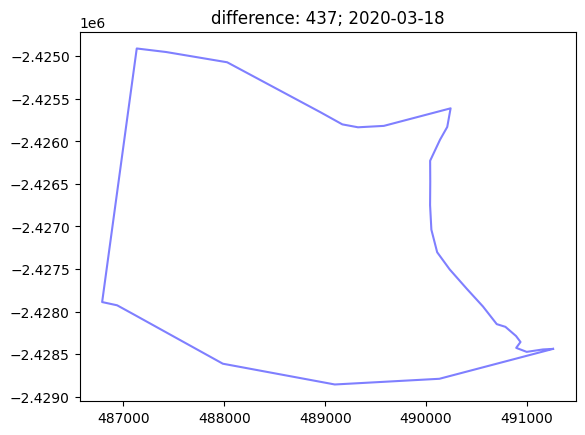

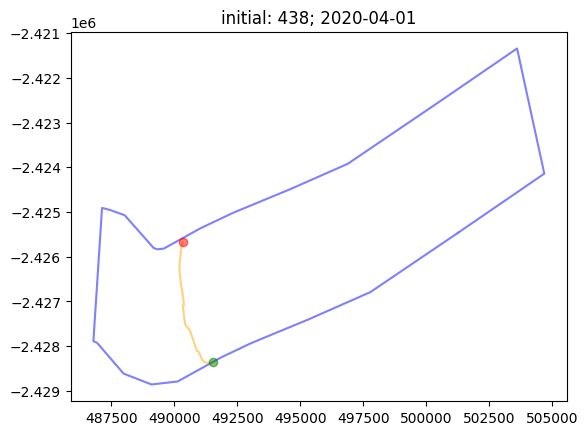

start fine
end relocating


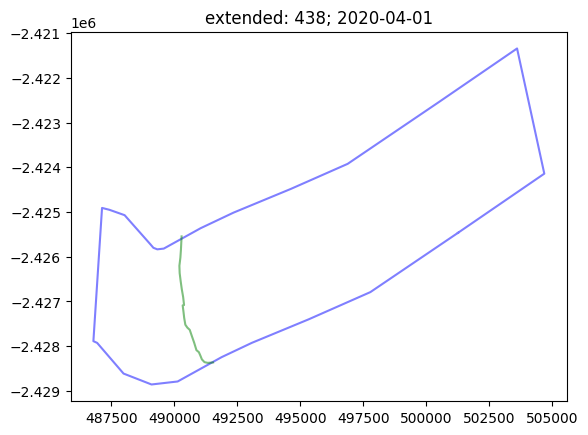

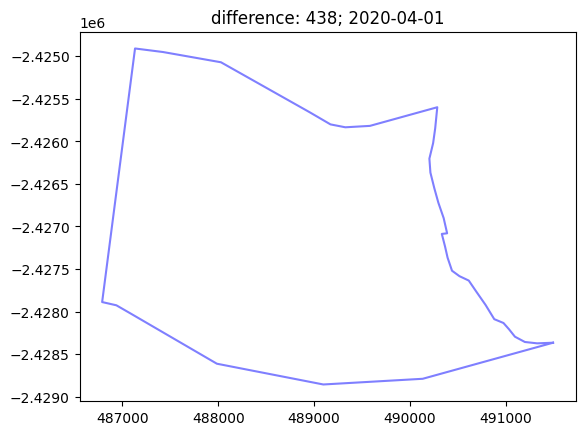

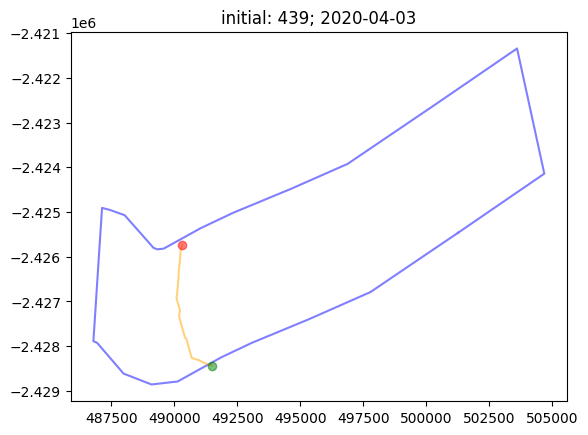

start fine
end relocating


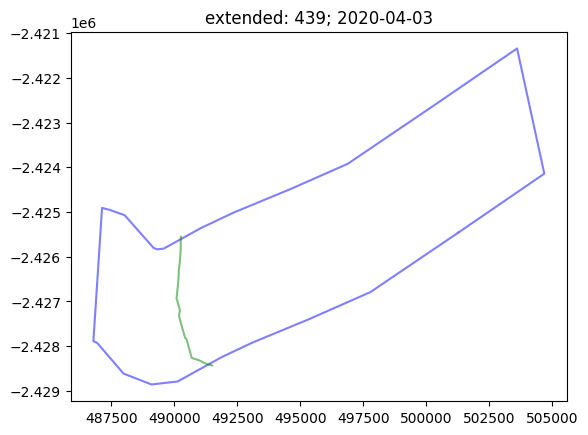

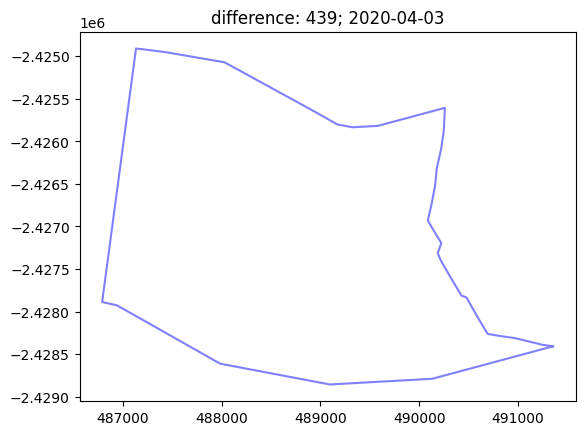

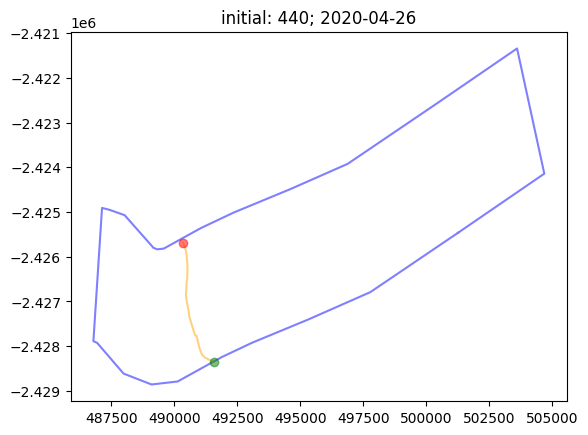

start fine
end relocating


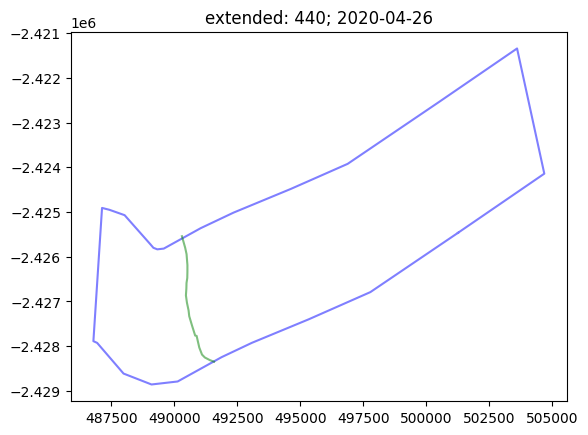

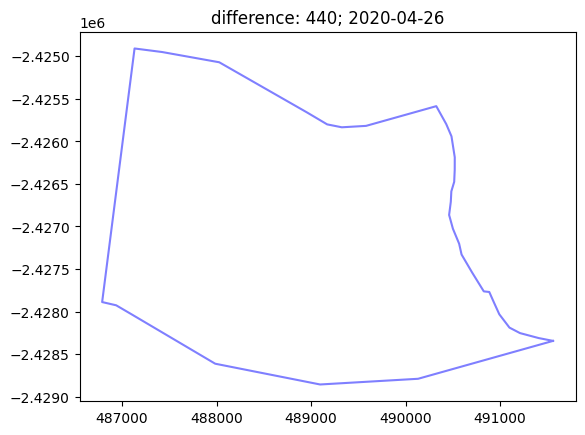

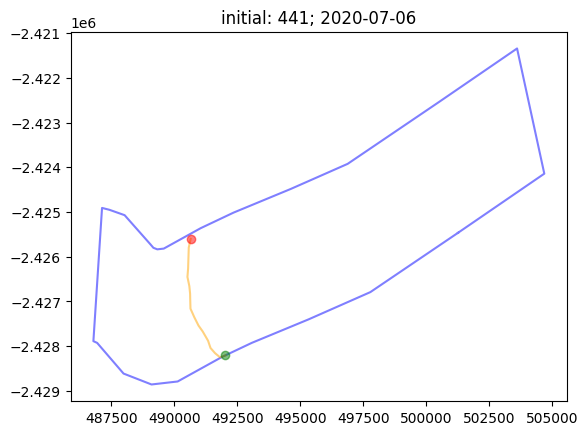

start fine
end relocating


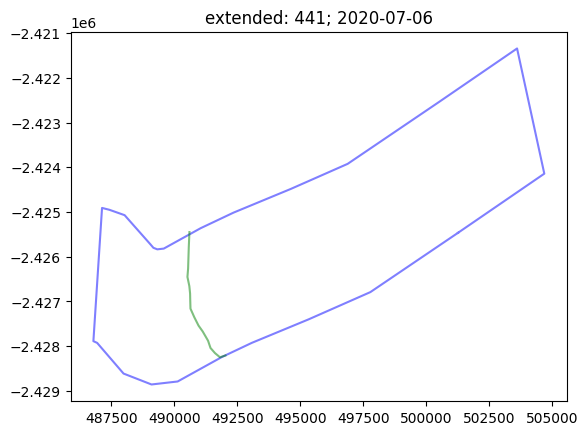

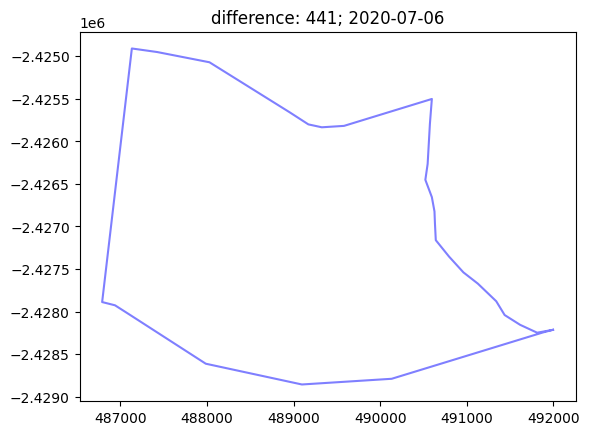

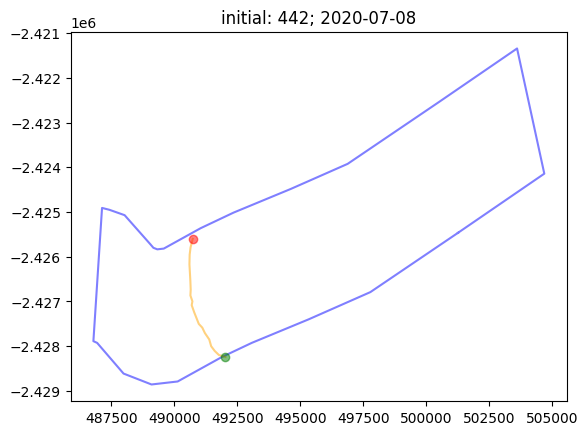

start fine
end relocating


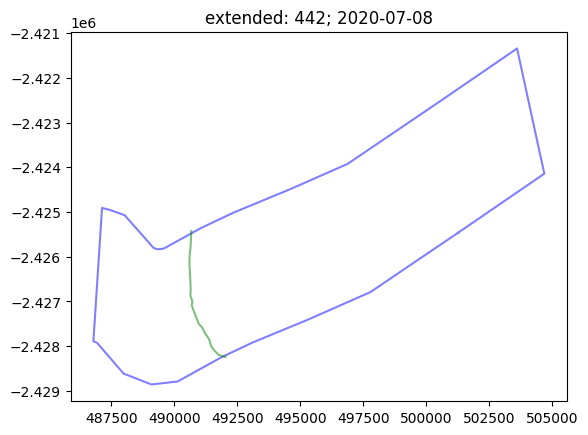

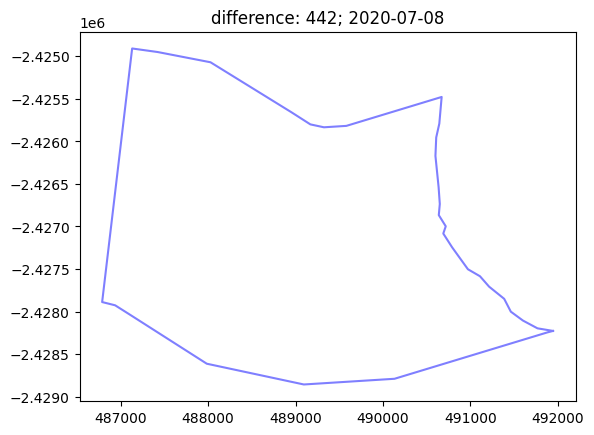

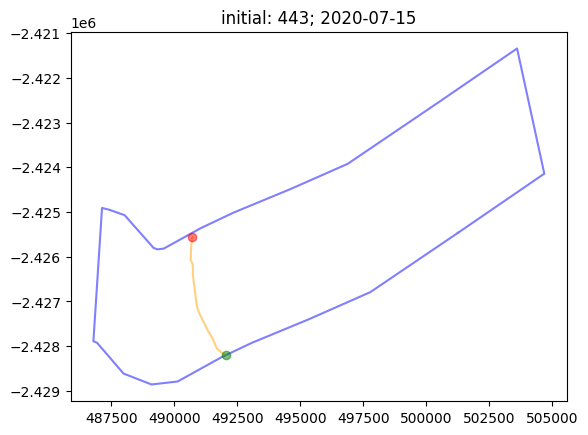

start fine
end relocating


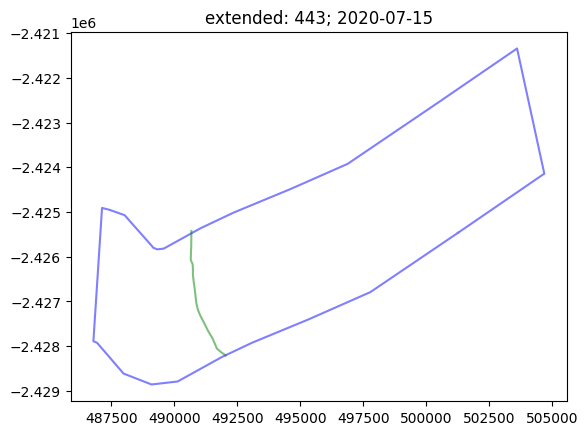

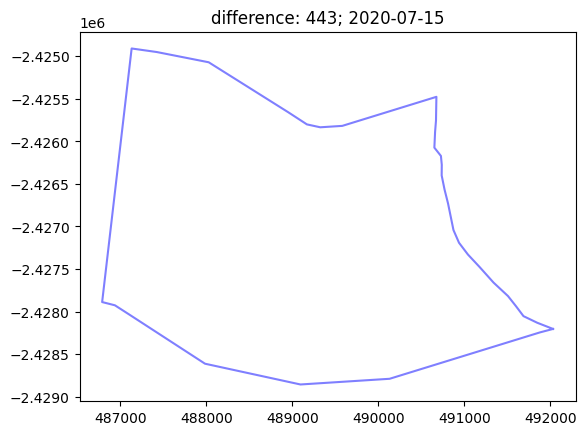

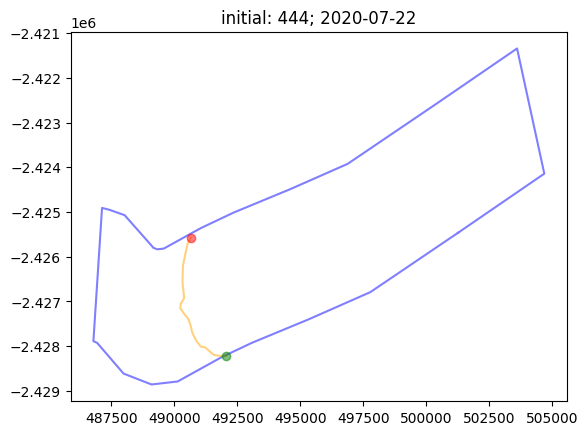

start fine
end relocating


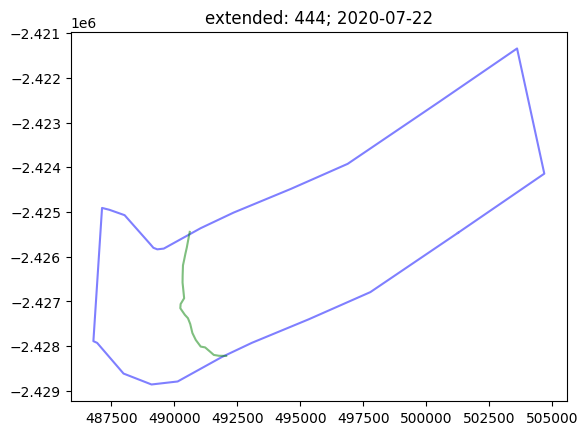

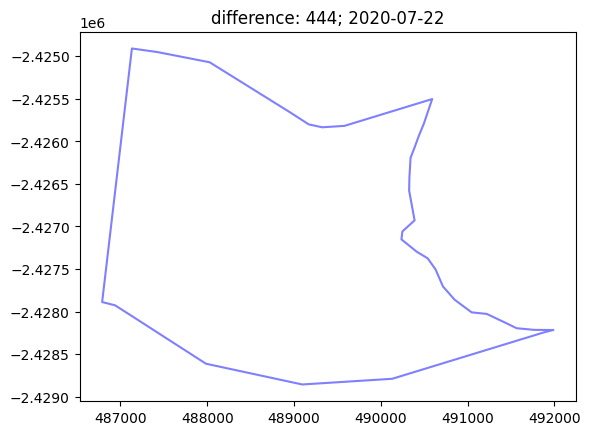

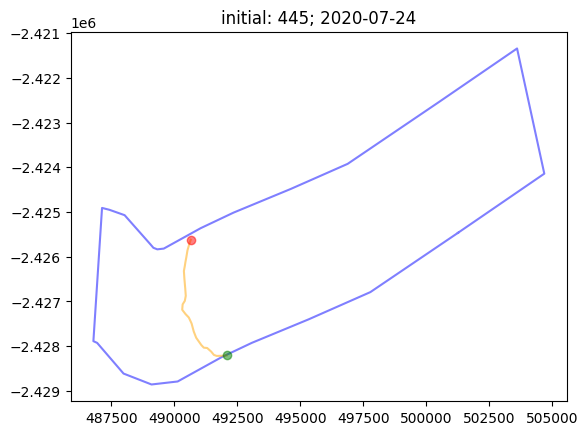

start fine
end relocating


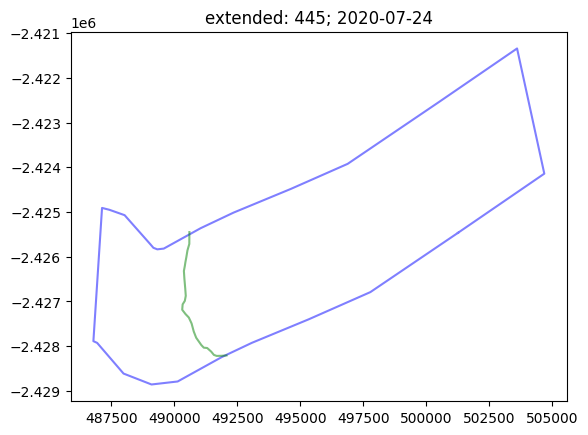

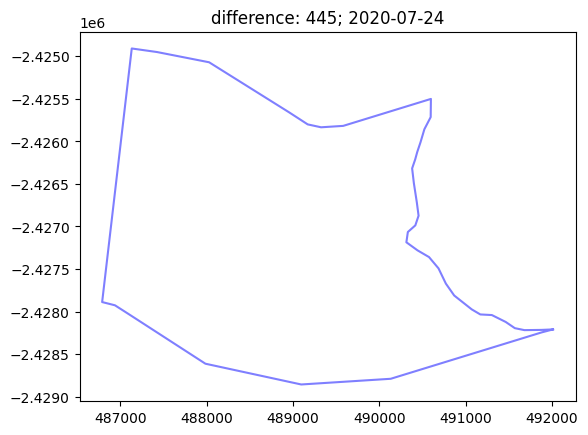

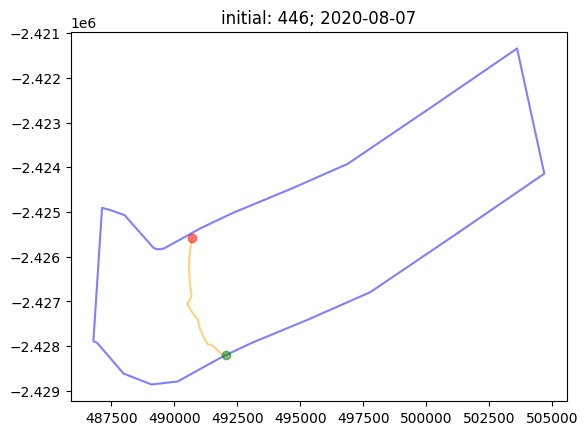

start fine
end relocating


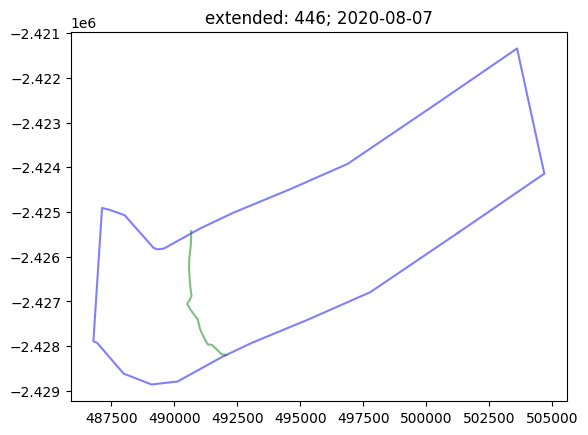

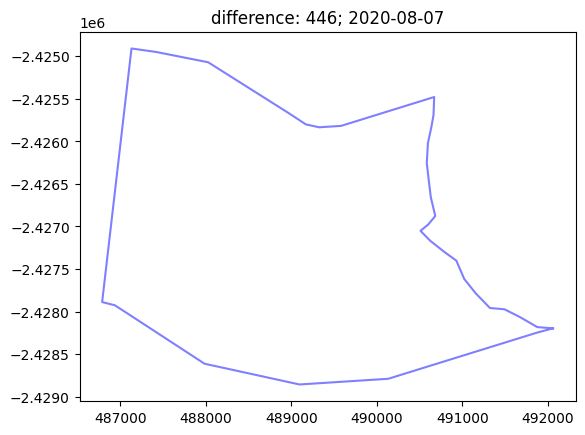

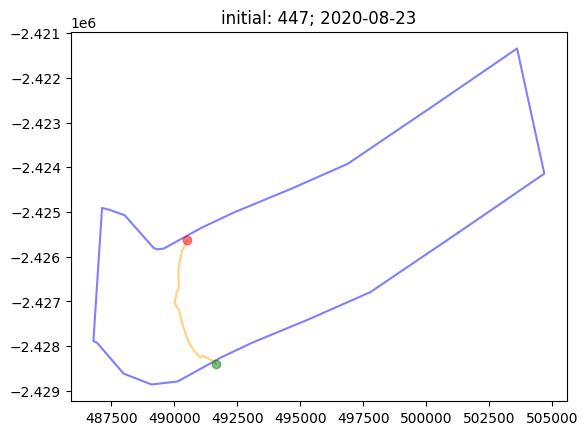

start fine
end relocating


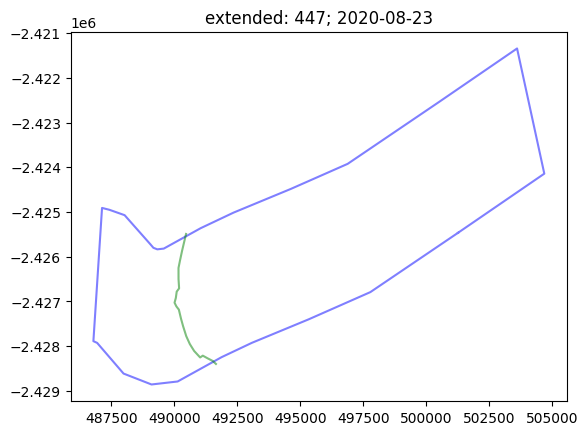

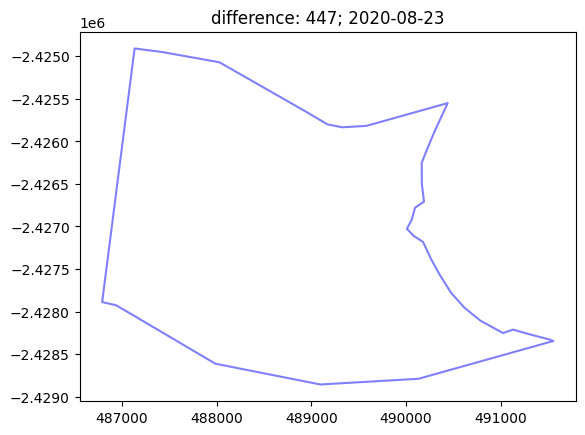

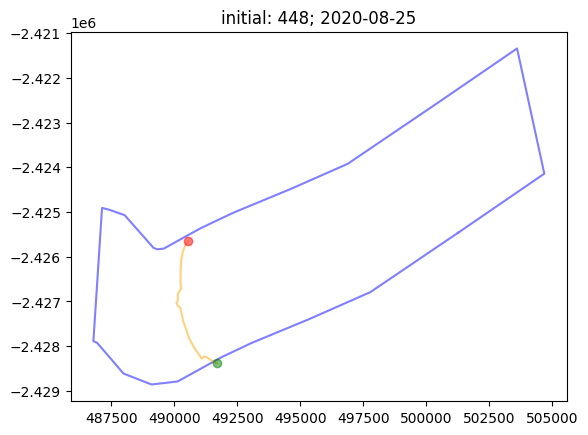

start fine
end relocating


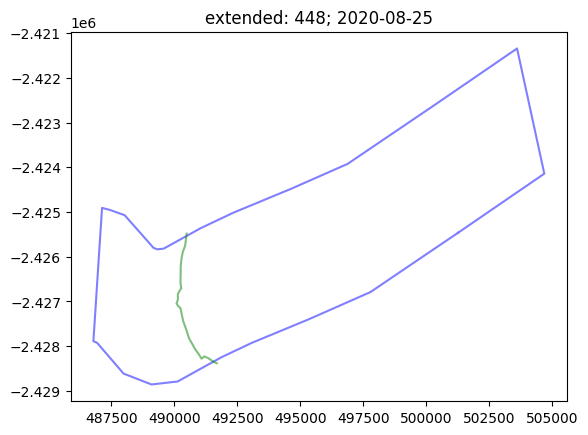

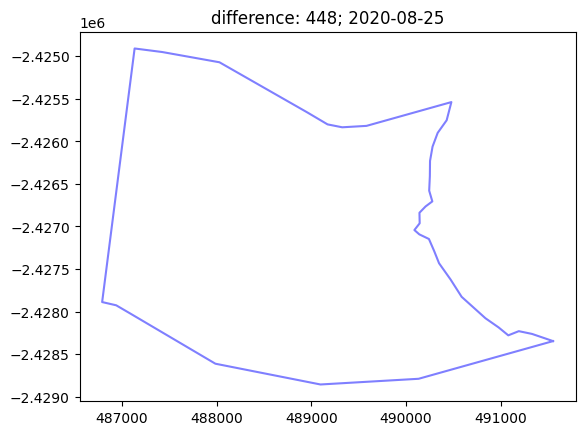

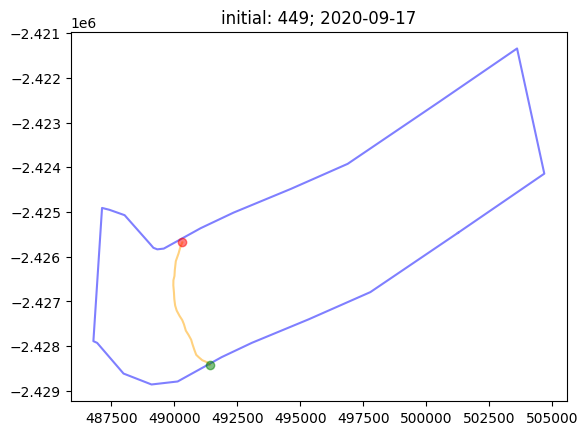

start fine
end relocating


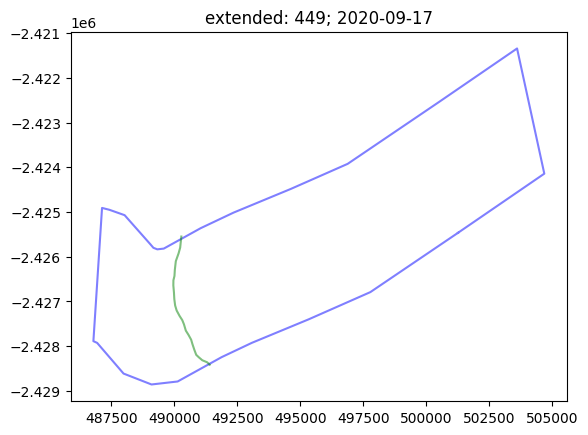

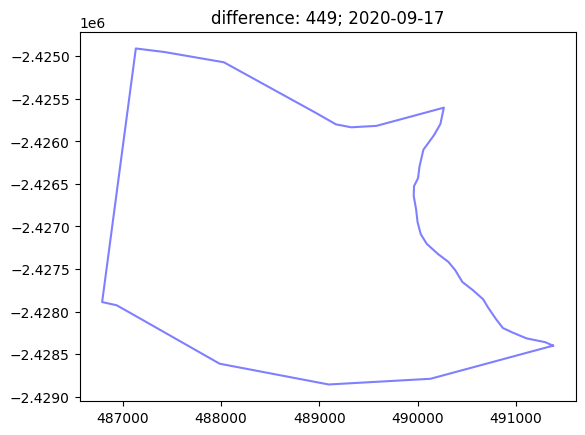

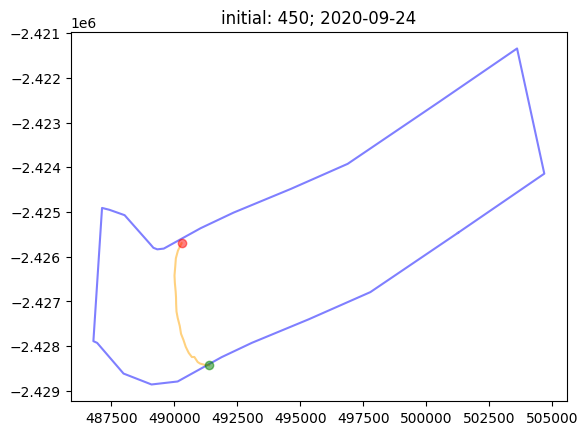

start fine
end relocating


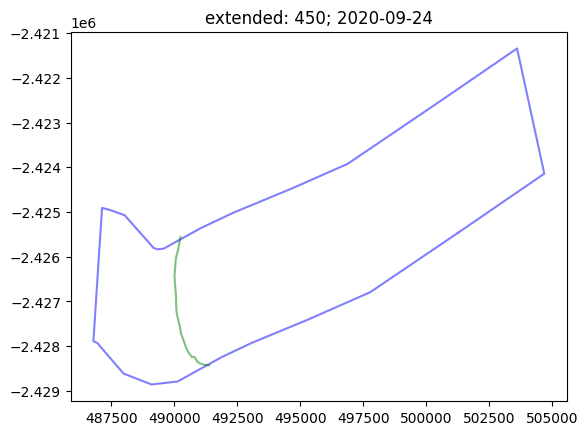

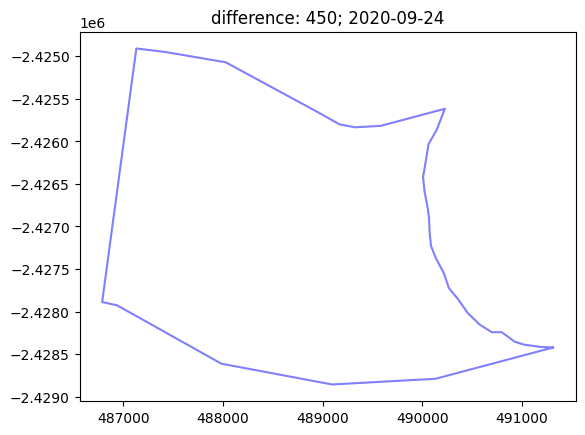

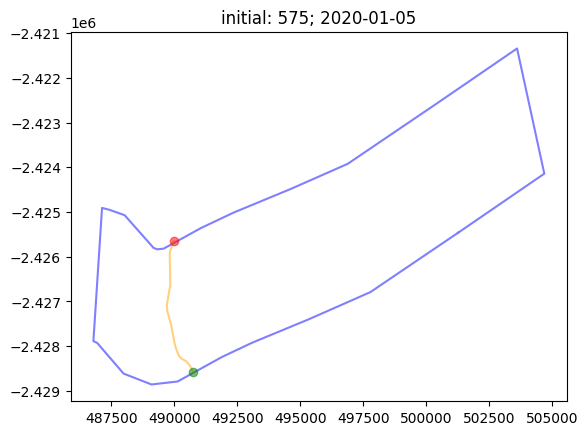

start relocating
end fine


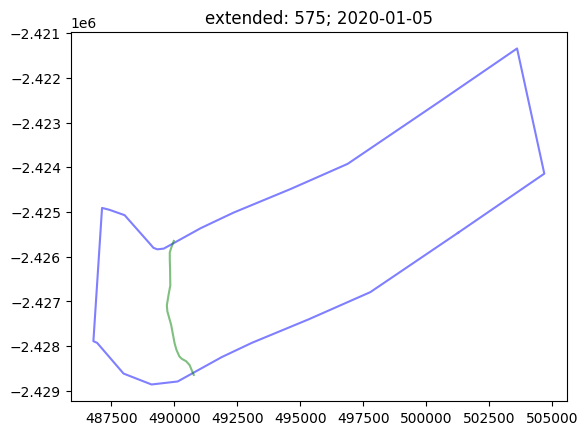

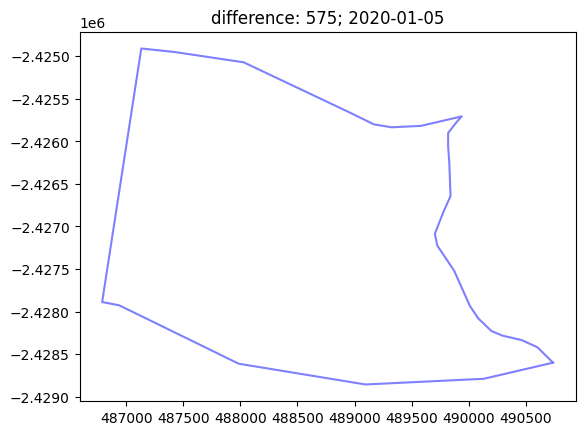

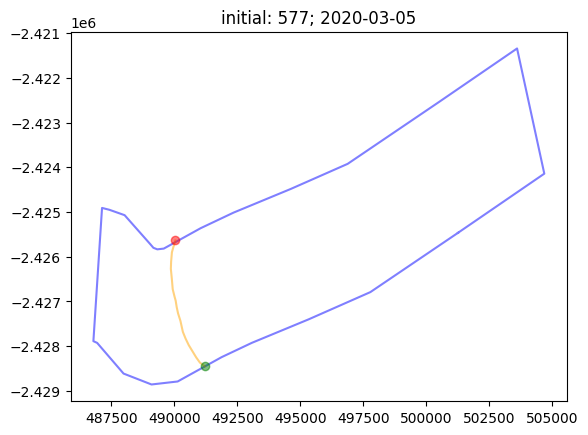

start relocating
end fine


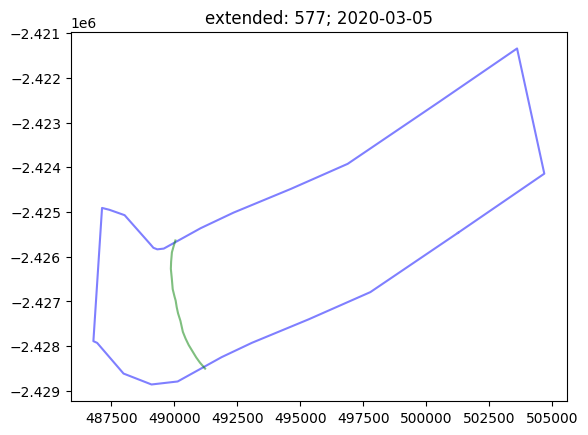

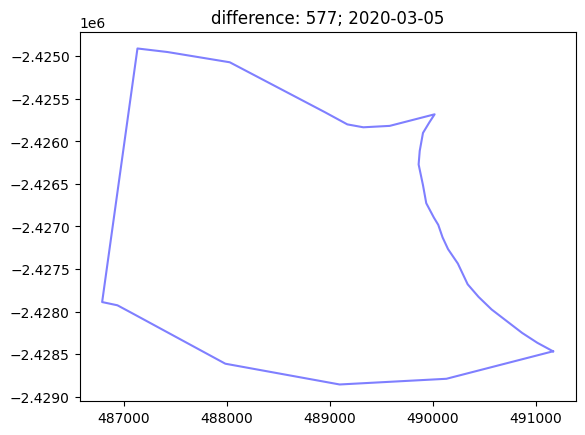

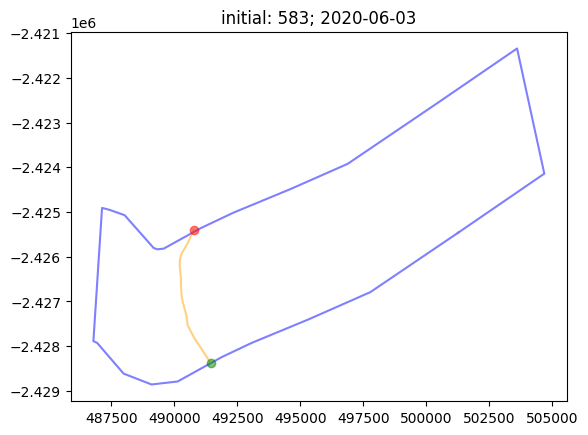

start relocating
end fine


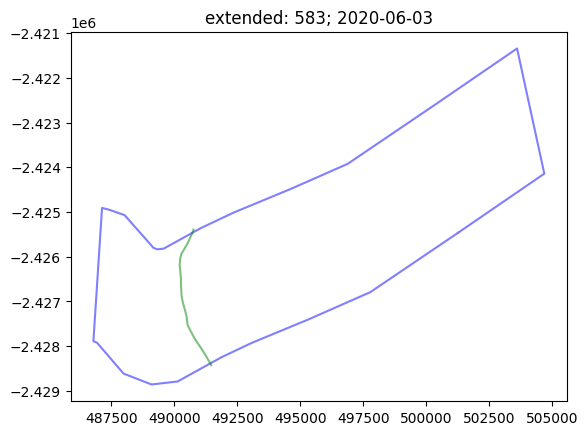

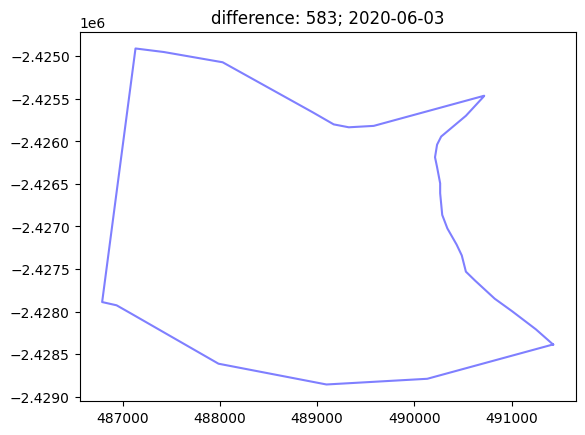

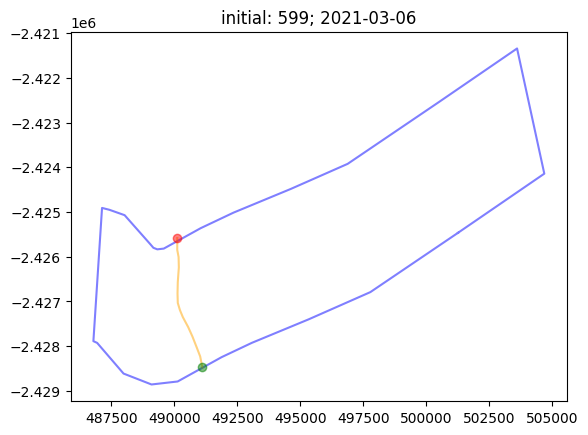

start relocating
end fine


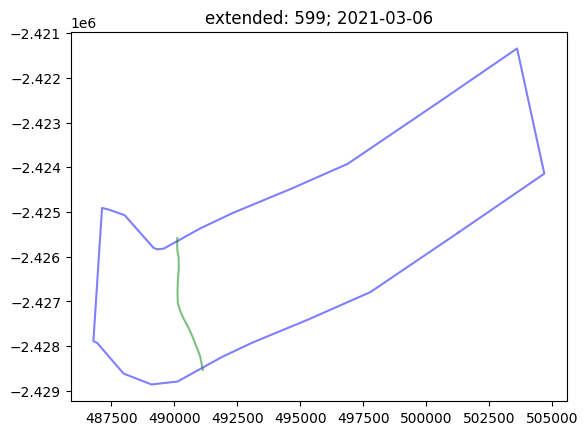

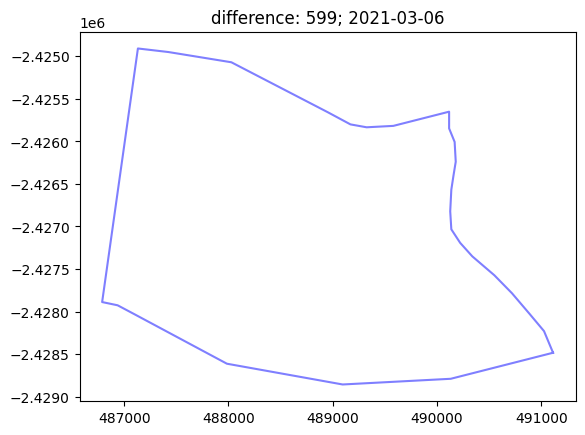

In [105]:
import geopandas as gpd
from shapely.geometry import LineString, Point
import shapely.ops
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np



GLACIERS = ["DJ", "UI"]

terminus_boxes = gpd.read_file("..\\data\\terminus\\terminus_boxes.geojson")


terminus_positions = gpd.read_file("..\\data\\terminus\\terminus_1978_2021.geojson")

out = []

for glacier in GLACIERS:
    print(f"Working on {glacier}")

    box = terminus_boxes[terminus_boxes["glacier_code"] == glacier].reset_index()
    traces = terminus_positions[terminus_positions["glacier_code"] == glacier]

    for index, trace in traces.iterrows():
        difference = shapely.ops.split(box.geometry[0], trace.geometry.geoms[0])

        if len(difference.geoms) == 1:
            trace_line = trace.geometry.geoms[0]
            trace_start = trace_line.coords[0]
            trace_end = trace_line.coords[-1]

            if trace.glacier_code == "UI":
                fig, ax = plt.subplots()
                x, y = box.geometry[0].geoms[0].exterior.xy
                plt.plot(x, y, color="blue", alpha=0.5)
                x, y = trace.geometry.geoms[0].xy
                plt.plot(x, y, color="orange", alpha=0.5)
                x, y = trace_start
                plt.plot(x, y, color="green", marker="o", alpha=0.5)
                x, y = trace_end
                plt.plot(x, y, color="red", marker="o", alpha=0.5)
                plt.title(f"initial: {index}; {trace.date}")
                plt.show()

            nearest_start = (
                box.geometry[0]
                .geoms[0]
                .exterior.interpolate(
                    box.geometry[0].geoms[0].exterior.project(Point(trace_start))
                )
            )
            nearest_end = (
                box.geometry[0]
                .geoms[0]
                .exterior.interpolate(
                    box.geometry[0].geoms[0].exterior.project(Point(trace_end))
                )
            )

            if box.geometry[0].geoms[0].contains(Point(trace_start)):
                if trace.glacier_code == "UI":
                    print("start relocating")
                start_edge = (
                    box.geometry[0]
                    .geoms[0]
                    .exterior.interpolate(
                        box.geometry[0].geoms[0].exterior.project(nearest_start) - 50
                    )
                )
                start_vec = np.array(nearest_start.coords[0]) - np.array(start_edge.coords[0])
                start_perpendicular = (start_vec[1], -start_vec[0]) / np.linalg.norm(start_vec)
                trace_start_moved = (
                    nearest_start.x - start_perpendicular[0] * 50,
                    nearest_start.y - start_perpendicular[1] * 50,
                )
            else:
                if trace.glacier_code == "UI":
                    print("start fine")
                trace_start_moved = trace_start

            if box.geometry[0].geoms[0].contains(Point(trace_end)):
                if trace.glacier_code == "UI":
                    print("end relocating")
                end_edge = (
                    box.geometry[0]
                    .geoms[0]
                    .exterior.interpolate(
                        box.geometry[0].geoms[0].exterior.project(nearest_end) + 50
                    )
                )
                end_vec = np.array(nearest_end.coords[0]) - np.array(end_edge.coords[0])
                end_perpendicular = (end_vec[1], -end_vec[0]) / np.linalg.norm(end_vec)
                trace_end_moved = (
                    nearest_end.x + end_perpendicular[0] * 50,
                    nearest_end.y + end_perpendicular[1] * 50,
                )
            else:
                if trace.glacier_code == "UI":
                    print("end fine")
                trace_end_moved = trace_end

            trace_line_extended = list(trace_line.coords)
            trace_line_extended[0] = trace_start_moved
            trace_line_extended[-1] = trace_end_moved
            trace_line_extended = LineString(trace_line_extended)

            if trace.glacier_code == "UI":
                fig, ax = plt.subplots()
                x, y = box.geometry[0].geoms[0].exterior.xy
                plt.plot(x, y, color="blue", alpha=0.5)
                x, y = trace_line_extended.xy
                plt.plot(x, y, color="green", alpha=0.5)
                plt.title(f"extended: {index}; {trace.date}")
                plt.show()

            difference = shapely.ops.split(box.geometry[0], trace_line_extended)

            if trace.glacier_code == "UI":
                fig, ax = plt.subplots()
                x, y = difference.geoms[1].exterior.xy
                plt.plot(x, y, color="blue", alpha=0.5)
                plt.title(f"difference: {index}; {trace.date}")
                plt.show()

    difference_gdf = trace.drop(labels=["geometry"])
    difference_gdf["geometry"] = difference.geoms[1]
    difference_gdf = gpd.GeoDataFrame(difference_gdf).transpose().set_geometry("geometry")
    difference_gdf.set_crs(terminus_positions.crs, inplace=True)

    out.append(difference_gdf)

out_gdf = pd.concat(out, ignore_index=True)
out_gdf.to_file("out2.geojson", driver="GeoJSON")

In [108]:
import geopandas as gpd
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from shapely.ops import split
from shapely.geometry import LineString, Point

GLACIERS = ["DJ", "UI"]

terminus_boxes = gpd.read_file("..\\data\\terminus\\terminus_boxes.geojson")
terminus_positions = gpd.read_file("..\\data\\terminus\\terminus_1978_2021.geojson")

out = []

for glacier in GLACIERS:
    print(f"Working on {glacier}")

    box = terminus_boxes[terminus_boxes["glacier_code"] == glacier].reset_index()
    traces = terminus_positions[terminus_positions["glacier_code"] == glacier]

    for index, trace in traces.iterrows():
        difference = split(box.geometry[0], trace.geometry.geoms[0])

        if len(difference.geoms) == 1:
            trace_line = trace.geometry.geoms[0]
            trace_start = trace_line.coords[0]
            trace_end = trace_line.coords[-1]

            # # INITIAL STATE PLOT
            # fig, ax = plt.subplots()
            # x, y = box.geometry[0].geoms[0].exterior.xy
            # plt.plot(x, y, color="blue", alpha=0.5)
            # x, y = trace.geometry.geoms[0].xy
            # plt.plot(x, y, color="orange", alpha=0.5)
            # x, y = trace_start
            # plt.plot(x, y, color="green", marker="o", alpha=0.5)
            # x, y = trace_end
            # plt.plot(x, y, color="red", marker="o", alpha=0.5)
            # plt.title(f"initial: {index}; {trace.date}")
            # plt.show()

            nearest_start = (
                box.geometry[0]
                .geoms[0]
                .exterior.interpolate(
                    box.geometry[0].geoms[0].exterior.project(Point(trace_start))
                )
            )
            nearest_end = (
                box.geometry[0]
                .geoms[0]
                .exterior.interpolate(
                    box.geometry[0].geoms[0].exterior.project(Point(trace_end))
                )
            )

            if box.geometry[0].geoms[0].contains(Point(trace_start)):
                start_edge = (
                    box.geometry[0]
                    .geoms[0]
                    .exterior.interpolate(
                        box.geometry[0].geoms[0].exterior.project(nearest_start) - 50
                    )
                )
                start_vec = np.array(nearest_start.coords[0]) - np.array(start_edge.coords[0])
                start_perpendicular = (start_vec[1], -start_vec[0]) / np.linalg.norm(start_vec)
                trace_start_moved = (
                    nearest_start.x - start_perpendicular[0] * 50,
                    nearest_start.y - start_perpendicular[1] * 50,
                )
            else:
                trace_start_moved = trace_start

            if box.geometry[0].geoms[0].contains(Point(trace_end)):
                end_edge = (
                    box.geometry[0]
                    .geoms[0]
                    .exterior.interpolate(
                        box.geometry[0].geoms[0].exterior.project(nearest_end) + 50
                    )
                )
                end_vec = np.array(nearest_end.coords[0]) - np.array(end_edge.coords[0])
                end_perpendicular = (end_vec[1], -end_vec[0]) / np.linalg.norm(end_vec)
                trace_end_moved = (
                    nearest_end.x + end_perpendicular[0] * 50,
                    nearest_end.y + end_perpendicular[1] * 50,
                )
            else:
                trace_end_moved = trace_end

            trace_line_extended = list(trace_line.coords)
            trace_line_extended[0] = trace_start_moved
            trace_line_extended[-1] = trace_end_moved
            trace_line_extended = LineString(trace_line_extended)

            # # EXTENDED LINE PLOT
            # if trace.glacier_code == "UI":
            #     fig, ax = plt.subplots()
            #     x, y = box.geometry[0].geoms[0].exterior.xy
            #     plt.plot(x, y, color="blue", alpha=0.5)
            #     x, y = trace_line_extended.xy
            #     plt.plot(x, y, color="green", alpha=0.5)
            #     plt.title(f"extended: {index}; {trace.date}")
            #     plt.show()

            difference = split(box.geometry[0], trace_line_extended)

            # # CLOSED BOX PLOT
            # if trace.glacier_code == "UI":
            #     fig, ax = plt.subplots()
            #     x, y = difference.geoms[1].exterior.xy
            #     plt.plot(x, y, color="blue", alpha=0.5)
            #     plt.title(f"difference: {index}; {trace.date}")
            #     plt.show()

        difference_gdf = trace.drop(labels=["geometry"])
        difference_gdf["geometry"] = difference.geoms[1]
        difference_gdf = gpd.GeoDataFrame(difference_gdf).transpose().set_geometry("geometry")
        difference_gdf.set_crs(terminus_positions.crs, inplace=True)

        out.append(difference_gdf)

out_gdf = pd.concat(out, ignore_index=True)
out_gdf.to_file("..\\data\\terminus\\terminus_boxes-terminated.geojson", driver="GeoJSON")

Working on DJ
Working on UI
